# **Librerias**

In [1]:
# Importamos 

import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from matplotlib.patches import Patch
from scipy.stats import logistic, gumbel_r, bernoulli, binom, geom, nbinom, poisson, uniform, norm, beta, expon, gamma, lognorm, laplace, t
from scipy.special import zeta, gammaln, psi, factorial, gamma as gammafn, beta as betafn, betainc as betaincfn, gammaincc as gammaincfn, digamma as digammafn, gammainc as gammaincifn, hyp2f1

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
Scipy Version: 1.13.1
Matplotlib Version: 3.9.4


# **Discretas**

### **Bernoulli**

Una **variable aleatoria Bernoulli** $X$ es una variable discreta que toma solo dos valores posibles: **1 (exito) con probabilidad $p$** y **0 (fracaso) con probabilidad $(1 - p)$**

**Parametros** 

* **Probabilidad de Exito**: $p$

$$0 \leq p \leq 1$$

**Simbologia** 

$$X \sim \text{Bern}(p)$$

**Dominio** 

$$x \in \{0, 1\}$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = p^x \cdot (1 - p)^{1 - x}$$

**Funcion de Distribucion Acumulada (CDF)** 

$$F(x) = P(X \leq x) = \begin{cases} 0 & \text{si } x < 0\\ 1 - p & \text{si } 0 \leq x < 1\\ 1 & \text{si } x \geq 1\end{cases}$$

**Valor Esperado** 

$$E[X] = p$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = p \cdot (1 - p)$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{1 - 2p}{\sqrt{p \cdot (1 - p)}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{1 - 6p \cdot (1 - p)}{p \cdot (1 - p)}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \sum_{i} P(x_i) \cdot \text{log} \left(P(x_i)\right) = -(1 - p) \cdot \text{log}(1 - p) - p \cdot \text{log}(p)$$

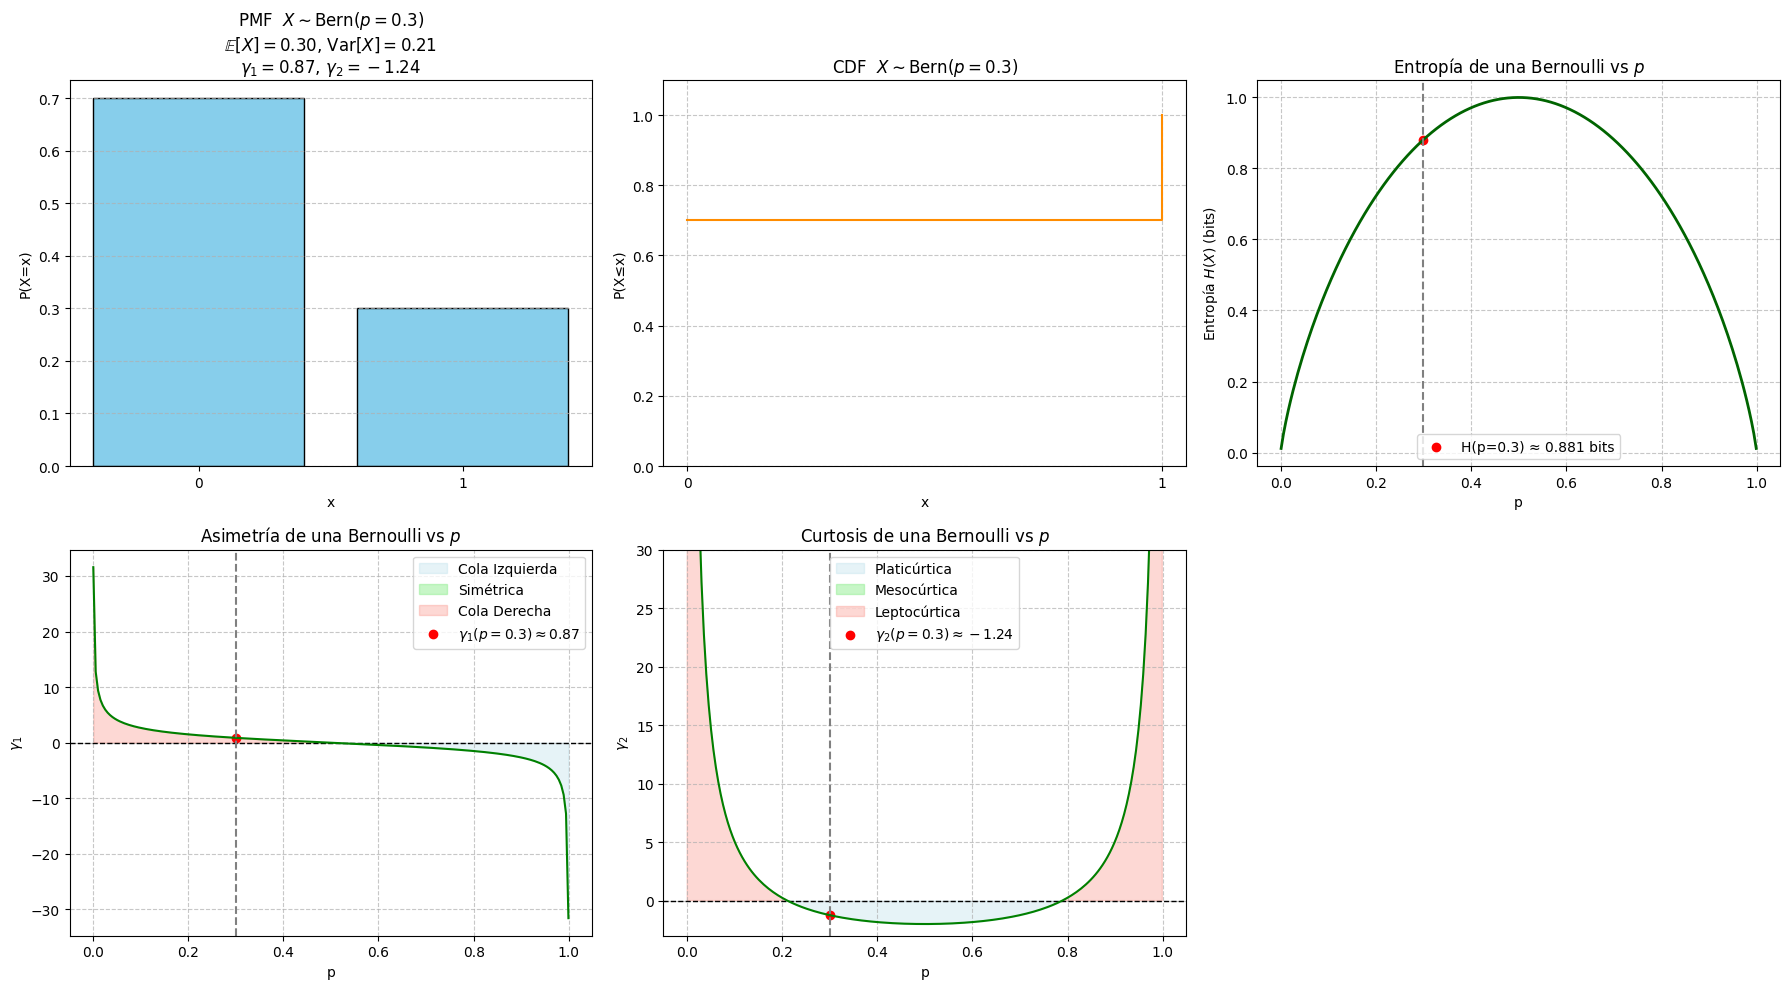

In [2]:
# Definimos los Parametros de la Distribucion

p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = bernoulli(p_param)

# Definimos el Dominio

x = np.array([0, 1])

# Definimos las Funciones PMF y CDF

pmf_vals = rv.pmf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

p_vals = np.linspace(0.001, 0.999, 200)

entropy = rv.entropy() / np.log(2)
H_vals = (-p_vals * np.log(p_vals) - (1 - p_vals) * np.log(1 - p_vals)) / np.log(2)

# Asimetria 

asymmetry_p  = (1 - 2*p_param) / np.sqrt(p_param * (1 - p_param))
asymmetry_vals  = (1 - 2*p_vals) / np.sqrt(p_vals * (1 - p_vals))

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = (1 - 6 * p_param * (1 - p_param)) / (p_param * (1 - p_param))
kurtosis_vals = (1 - 6 * p_vals * (1 - p_vals)) / (p_vals * (1 - p_vals))

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0, 0].set_title(f'PMF  $X \\sim \\text{{Bern}}(p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('P(X=x)')
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[0, 1].step(x, cdf_vals, where = 'post', color = 'darkorange')
axs[0, 1].set_title(f'CDF  $X \\sim \\text{{Bern}}(p={p_param})$')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('P(X≤x)')
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(p_vals, H_vals, color = 'darkgreen', lw = 2)
axs[0, 2].axvline(p_param, color = 'gray', linestyle = '--')
axs[0, 2].scatter(p_param, entropy, color = 'red', label = f'H(p={p_param}) ≈ {entropy:.3f} bits')
axs[0, 2].set_title('Entropía de una Bernoulli vs $p$')
axs[0, 2].set_xlabel('p')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(p_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(p_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(p_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 0].plot(p_vals, asymmetry_vals, color = 'green')
axs[1, 0].axvline(p_param, color = 'gray', linestyle = '--')
axs[1, 0].scatter(p_param, asymmetry_p, color = 'red', label = f'$\\gamma_1(p={p_param}) \\approx {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetría de una Bernoulli vs $p$')
axs[1, 0].set_xlabel('p')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(p_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(p_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(p_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].plot(p_vals, kurtosis_vals, color = 'green')
axs[1, 1].axvline(p_param, color = 'gray', linestyle = '--')
axs[1, 1].scatter(p_param, kurtosis_p, color = 'red', label = f'$\\gamma_2(p={p_param}) \\approx {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Bernoulli vs $p$')
axs[1, 1].set_xlabel('p')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-3, 30)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Binomial** 

Una **variable aleatoria Binomial** $X$ es una variable discreta que **cuenta el numero de exitos en $n$ intentos independientes**, cada uno con probabilidad de exito $p$

**Parametros** 

* **Probabilidad de Exito**: $p$

$$0 \leq p \leq 1$$

* **Numero de Intentos**: $n$

$$n \in \{0, 1, 2, ...\}$$

**Simbologia** 

$$X \sim \text{Bin}(n, p)$$

**Dominio** 

* **Numero de Exitos**: $x$

$$x \in \{0, 1, 2, 3, \dots, n\}$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = \binom{n}{x} \cdot p^x \cdot (1 - p)^{n - x}$$

**Funcion de Distribucion Acumulada (CDF)** 

$$F(x) = P(X \leq x) = I_{1 - p}(n - x, x + 1)$$

**Valor Esperado** 

$$E[X] = np$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = np \cdot (1 - p)$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{1 - 2p}{\sqrt{np \cdot (1 - p)}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{1 - 6p(1 - p)}{np \cdot (1 - p)}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia Aproximada** 

$$H(X) = - \sum_{i} P(x_i) \cdot \text{log} \left(P(x_i)\right) = {\displaystyle {\frac {1}{2}}\log(2\pi \cdot e \cdot n \cdot p \cdot (1 - p))} + \text{O}\left(\frac{1}{n}\right)$$

**Nota:** La funcion $I_z(a, b)$ es la **funcion beta incompleta regularizada** definida como: 

$$I_z(a, b) = \frac{B(z; a, b)}{B(a, b)}$$

* En donde $B(z; a, b) = \int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt$ es la **funcion beta incompleta** y $B(a, b) = \int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$ es la **funcion beta completa** y $\Gamma(x)$ no es mas que la **funcion gamma**

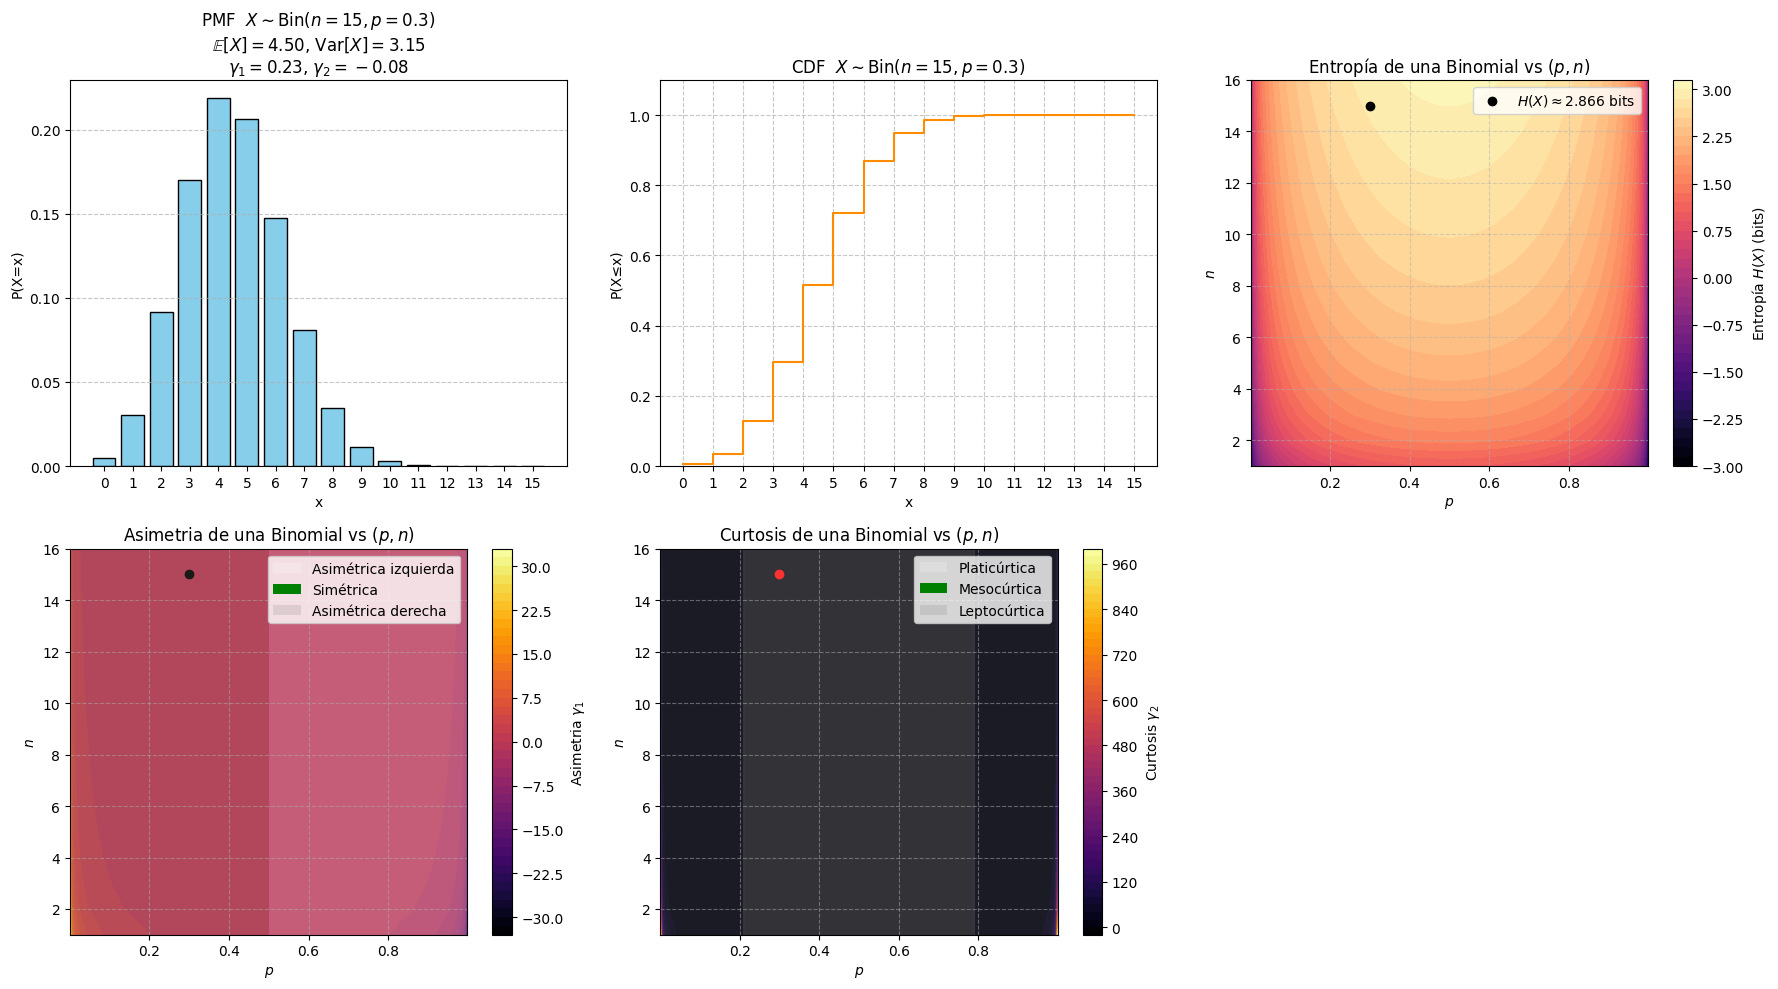

In [3]:
# Definimos los Parametros de la Distribucion

n_param = 15
p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = binom(n_param, p_param)

# Definimos el Dominio

x =  np.arange(0, n_param + 1)

# Definimos las Funciones PMF y CDF

pmf_vals = rv.pmf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

p_vals = np.linspace(0.001, 0.999, 200)
n_vals = np.linspace(1, 16, 16)

P, N = np.meshgrid(p_vals, n_vals)

entropy = rv.entropy() / np.log(2)
H_vals = (0.5 * np.log(2 * np.pi * np.e * N * P * (1 - P))) / np.log(2)

# Asimetria 

asymmetry_p  = (1 - 2*p_param) / np.sqrt(n_param * p_param * (1 - p_param))
asymmetry_vals  = (1 - 2*P) / np.sqrt(N * P * (1 - P))

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = (1 - 6 * p_param * (1 - p_param)) / (n_param * p_param * (1 - p_param))
kurtosis_vals = (1 - 6 * P * (1 - P)) / (N * P * (1 - P))

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0, 0].set_title(f'PMF  $X \\sim \\text{{Bin}}(n={n_param}, p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('P(X=x)')
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[0, 1].step(x, cdf_vals, where = 'post', color = 'darkorange')
axs[0, 1].set_title(f'CDF  $X \\sim \\text{{Bin}}(n={n_param}, p={p_param})$')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('P(X≤x)')
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

contour = axs[0, 2].contourf(P, N, H_vals, levels = 50, cmap = 'magma')
fig.colorbar(contour, ax = axs[0, 2], label = 'Entropía $H(X)$ (bits)')
axs[0, 2].scatter(p_param, n_param, color = 'black', label=f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_xlabel(r'$p$')
axs[0, 2].set_ylabel(r'$n$')
axs[0, 2].set_title('Entropía de una Binomial vs $(p, n)$')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.5)

contour = axs[1, 0].contourf(P, N, asymmetry_vals, levels = 50, cmap = 'inferno')
fig.colorbar(contour, ax = axs[1, 0], label = 'Asimetria $\\gamma_1$')
axs[1, 0].scatter(p_param, n_param, color = 'black', label=f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_xlabel(r'$p$')
axs[1, 0].set_ylabel(r'$n$')
axs[1, 0].set_title('Asimetria de una Binomial vs $(p, n)$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.5)
axs[1, 0].contourf(P, N, zona_izquierda, levels = [0.5, 1], colors = 'white' , alpha = 0.2)
axs[1, 0].contourf(P, N, zona_simetrica, levels = [0.5, 1], colors = 'green', alpha = 1)
axs[1, 0].contourf(P, N, zona_derecha, levels = [0.5, 1], colors = 'gray', alpha = 0.2)
zona_izquierda_patch = Patch(facecolor = 'white', alpha = 0.2, label = 'Asimétrica izquierda')
zona_simetrica_patch = Patch(facecolor = 'green', alpha = 1, label = 'Simétrica')
zona_derecha_patch = Patch(facecolor = 'gray', alpha = 0.2, label = 'Asimétrica derecha')
axs[1, 0].legend(handles = [zona_izquierda_patch, zona_simetrica_patch, zona_derecha_patch])

contour = axs[1, 1].contourf(P, N, kurtosis_vals, levels = 50, cmap = 'inferno')
fig.colorbar(contour, ax = axs[1, 1], label = 'Curtosis $\\gamma_2$')
axs[1, 1].scatter(p_param, n_param, color = 'red', label=f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_xlabel(r'$p$')
axs[1, 1].set_ylabel(r'$n$')
axs[1, 1].set_title('Curtosis de una Binomial vs $(p, n)$')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.5)
axs[1, 1].contourf(P, N, zona_platicurtica, levels = [0.5, 1], colors = 'white' , alpha = 0.2)
axs[1, 1].contourf(P, N, zona_mesocurtica, levels = [0.5, 1], colors = 'green', alpha = 1)
axs[1, 1].contourf(P, N, zona_leptocurtica, levels = [0.5, 1], colors = 'gray', alpha = 0.2)
zona_platicurtica_patch = Patch(facecolor = 'white', alpha = 0.2, label = 'Platicúrtica')
zona_mesocurtica_patch = Patch(facecolor = 'green', alpha = 1, label = 'Mesocúrtica')
zona_leptocurtica_patch = Patch(facecolor = 'gray', alpha = 0.2, label = 'Leptocúrtica')
axs[1, 1].legend(handles = [zona_platicurtica_patch, zona_mesocurtica_patch, zona_leptocurtica_patch])

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Geometrica** 

Una **variable aleatoria Geometrica** $X$ es una variable discreta que **modela el numero de intentos independientes necesarios hasta obtener el primer exito**, cada uno con probabilidad de exito $p$

**Parametros** 

* **Probabilidad de Exito**: $p$

$$0 \leq p \leq 1$$

**Simbologia** 

$$X \sim \text{Geo}(p)$$

**Dominio** 

$$x \in \{1, 2, 3, \dots, \infty\}$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = p \cdot (1 - p)^{x-1}$$

**Funcion de Distribucion Acumulada (CDF)** 

$$F(x) = P(X \leq x) = \begin{cases}
0 & \text{si } x < 1 \\
1 - (1 - p)^{\lfloor x \rfloor} & \text{si } x \geq 1
\end{cases}$$

**Valor Esperado** 

$$E[X] = \frac{1}{p}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{1 - p}{p^2}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{2 - p}{\sqrt{1 - p}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{p^2}{1 - p} + 6$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \sum_{i} P(x_i) \cdot \text{log} \left(P(x_i)\right) = \frac{-(1 - p) \cdot \text{log}(1 - p) - p \cdot \text{log}(p)}{p}$$

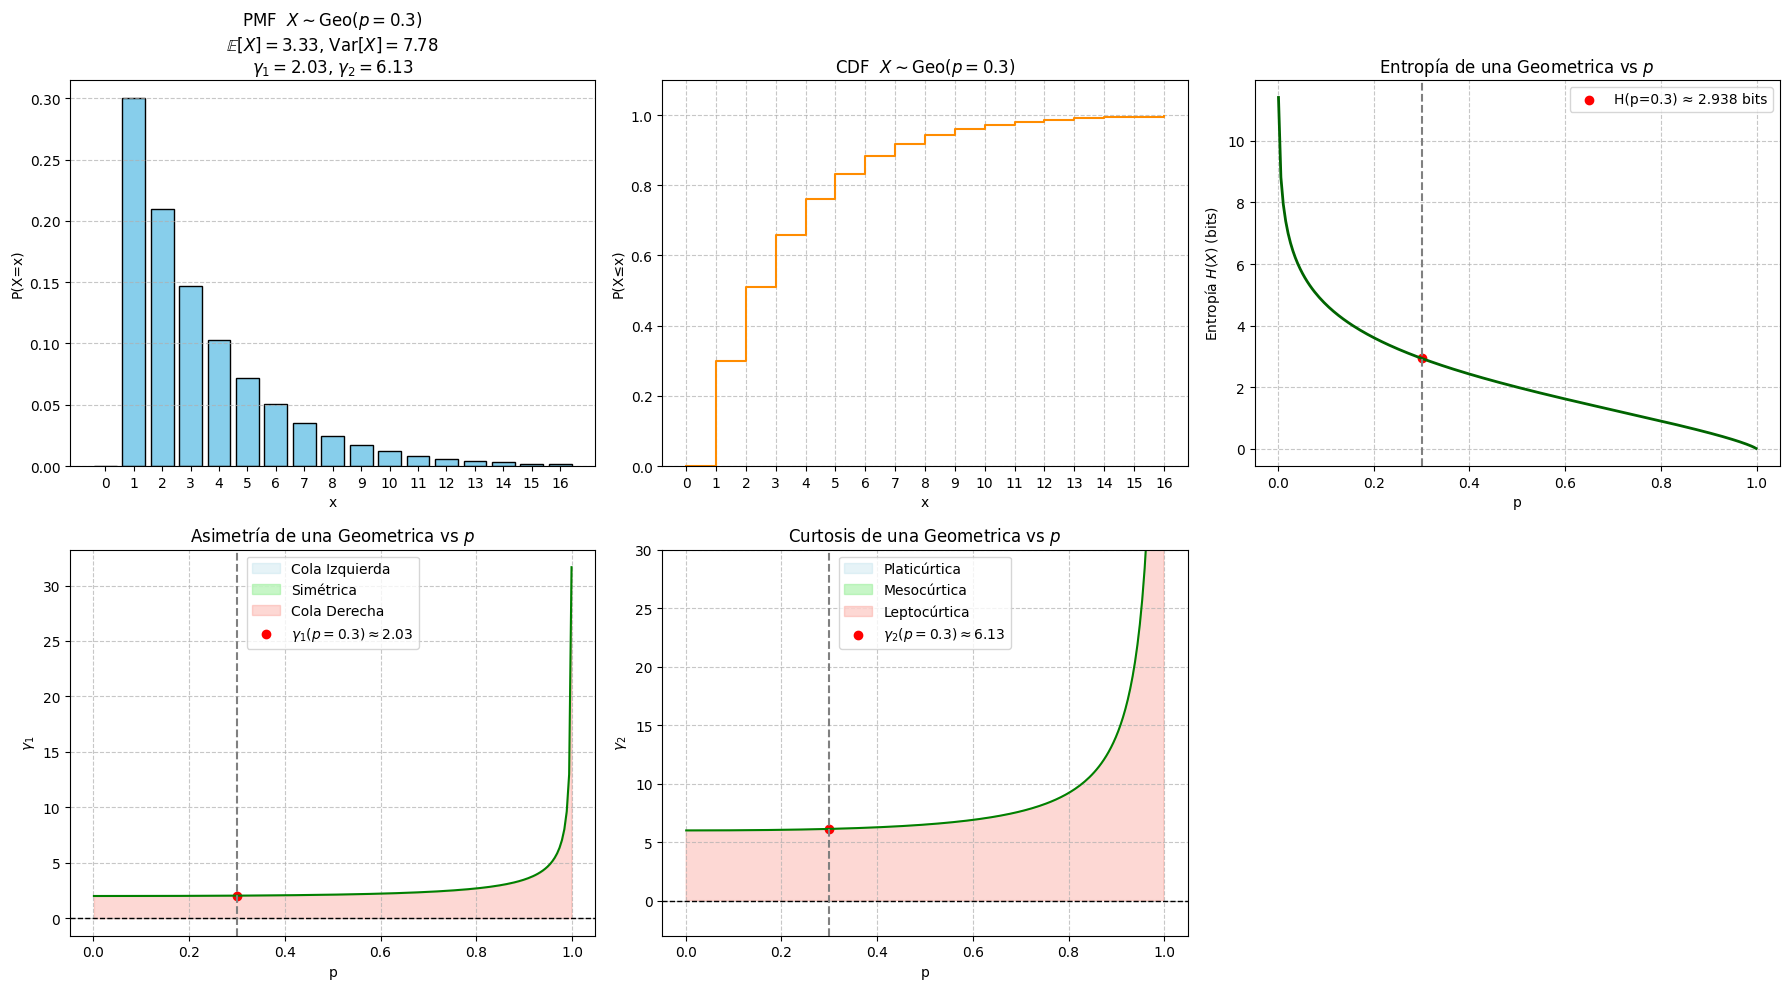

In [4]:
# Definimos los Parametros de la Distribucion

p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = geom(p_param)

# Definimos el Dominio

x =  np.arange(0, 17)

# Definimos las Funciones PMF y CDF

pmf_vals = rv.pmf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

p_vals = np.linspace(0.001, 0.999, 200)

entropy = rv.entropy() / np.log(2)
H_vals = ((-(1 - p_vals) * np.log(1 - p_vals) - p_vals * np.log(p_vals)) / p_vals) / np.log(2)

# Asimetria 

asymmetry_p  = (2 - p_param) / np.sqrt(1 - p_param)
asymmetry_vals  = (2 - p_vals) / np.sqrt(1 - p_vals)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = ((p_param**2) / (1 - p_param)) + 6
kurtosis_vals = ((p_vals**2) / (1 - p_vals)) + 6

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0, 0].set_title(f'PMF  $X \\sim \\text{{Geo}}(p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('P(X=x)')
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[0, 1].step(x, cdf_vals, where = 'post', color = 'darkorange')
axs[0, 1].set_title(f'CDF  $X \\sim \\text{{Geo}}(p={p_param})$')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('P(X≤x)')
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(p_vals, H_vals, color = 'darkgreen', lw = 2)
axs[0, 2].axvline(p_param, color = 'gray', linestyle = '--')
axs[0, 2].scatter(p_param, entropy, color = 'red', label = f'H(p={p_param}) ≈ {entropy:.3f} bits')
axs[0, 2].set_title('Entropía de una Geometrica vs $p$')
axs[0, 2].set_xlabel('p')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(p_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(p_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(p_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 0].plot(p_vals, asymmetry_vals, color = 'green')
axs[1, 0].axvline(p_param, color = 'gray', linestyle = '--')
axs[1, 0].scatter(p_param, asymmetry_p, color = 'red', label = f'$\\gamma_1(p={p_param}) \\approx {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetría de una Geometrica vs $p$')
axs[1, 0].set_xlabel('p')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(p_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(p_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(p_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].plot(p_vals, kurtosis_vals, color = 'green')
axs[1, 1].axvline(p_param, color = 'gray', linestyle = '--')
axs[1, 1].scatter(p_param, kurtosis_p, color = 'red', label = f'$\\gamma_2(p={p_param}) \\approx {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Geometrica vs $p$')
axs[1, 1].set_xlabel('p')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-3, 30)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Binomial Negativa** 

Una **variable aleatoria Binomial Negativa** $X$ es una variable discreta que **modela el numero de fracasos que ocurren hasta observar un total de $r$ exitos**, donde cada intento tiene una probabilidad de exito $p$

**Parametros** 

* **Probabilidad de Exito**: $p$

$$0 \leq p \leq 1$$

* **Numero de Exitos Requeridos**: $r$ 

$$r > 0$$

**Simbologia** 

$$X \sim \text{NB}(r, p)$$

**Dominio** 

$$x \in \{0, 1, 2, 3, \dots, \infty\}$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = \binom{x + r - 1}{x} \cdot p^r \cdot (1 - p)^x$$

**Funcion de Distribucion Acumulada (CDF)** 

$$F(x) = P(X \leq x) = I_p(r, x + 1)$$

**Valor Esperado** 

$$E[X] = \frac{r \cdot (1 - p)}{p}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{r \cdot (1 - p)}{p^2}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{2 - p}{\sqrt{r \cdot (1 - p)}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{p^2}{r \cdot (1 - p)} + \frac{6}{r}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Nota:** La funcion $I_z(a, b)$ es la **funcion beta incompleta regularizada** definida como: 

$$I_z(a, b) = \frac{B(z; a, b)}{B(a, b)}$$

* En donde $B(z; a, b) = \int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt$ es la **funcion beta incompleta** y $B(a, b) = \int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$ es la **funcion beta completa** y $\Gamma(x)$ no es mas que la **funcion gamma**

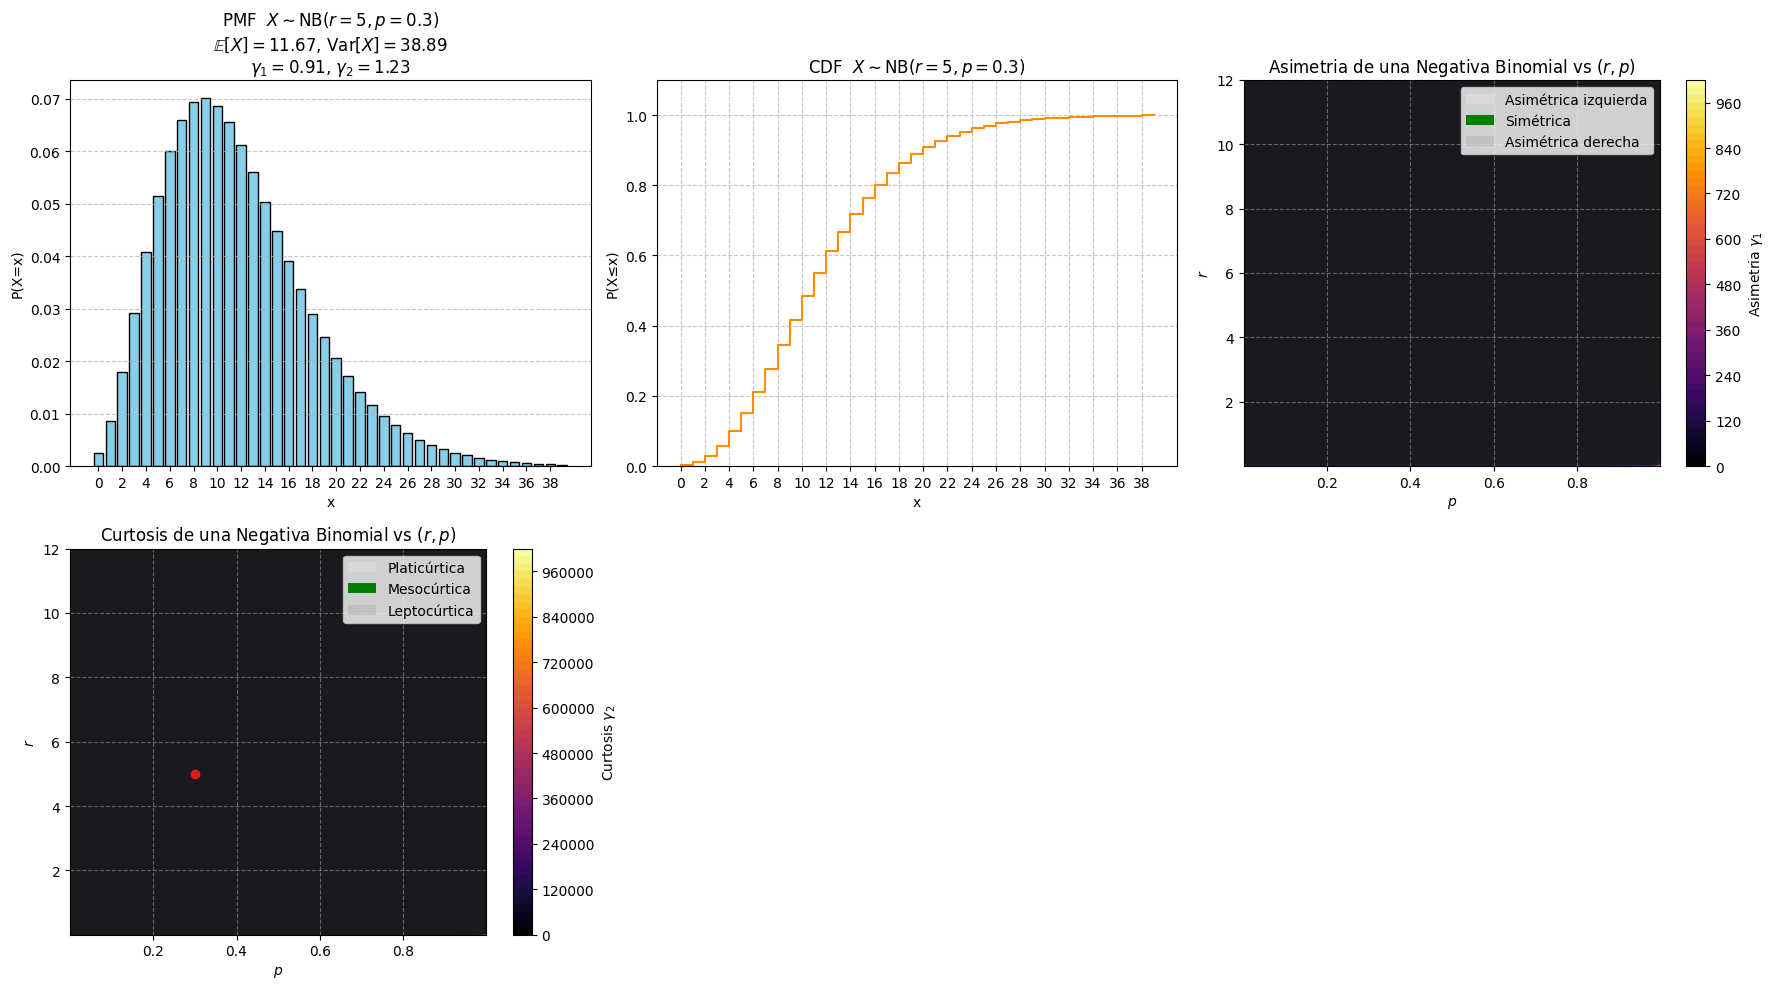

In [5]:
# Definimos los Parametros de la Distribucion

r_param = 5
p_param = 0.3

# Definimos la Distribucion Aleatoria 

rv = nbinom(r_param, p_param)

# Definimos el Dominio

x =  np.arange(0, 40)

# Definimos las Funciones PMF y CDF

pmf_vals = rv.pmf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Asimetria 

p_vals = np.linspace(0.001, 0.999, 200)
r_vals = np.linspace(0.001, 12, 500)

P, R = np.meshgrid(p_vals, r_vals)

asymmetry_p  = (2 - p_param) / np.sqrt(r_param * (1 - p_param))
asymmetry_vals  = (2 - P) / np.sqrt(R * (1 - P))

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = ((p_param**2) / (r_param * (1 - p_param))) + (6 / r_param)
kurtosis_vals = ((P**2) / (R * (1 - P))) + (6/R)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0, 0].set_title(f'PMF  $X \\sim \\text{{NB}}(r={r_param}, p={p_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('P(X=x)')
axs[0, 0].set_xticks(x[::2])
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[0, 1].step(x, cdf_vals, where = 'post', color = 'darkorange')
axs[0, 1].set_title(f'CDF  $X \\sim \\text{{NB}}(r={r_param}, p={p_param})$')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('P(X≤x)')
axs[0, 1].set_xticks(x[::2])
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

contour = axs[0, 2].contourf(P, R, asymmetry_vals, levels = 50, cmap = 'inferno')
fig.colorbar(contour, ax = axs[0, 2], label = 'Asimetria $\\gamma_1$')
axs[0, 2].scatter(p_param, r_param, color = 'black', label=f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[0, 2].set_xlabel(r'$p$')
axs[0, 2].set_ylabel(r'$r$')
axs[0, 2].set_title('Asimetria de una Negativa Binomial vs $(r, p)$')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.5)
axs[0, 2].contourf(P, R, zona_izquierda, levels = [0.5, 1], colors = 'white' , alpha = 0.2)
axs[0, 2].contourf(P, R, zona_simetrica, levels = [0.5, 1], colors = 'green', alpha = 1)
axs[0, 2].contourf(P, R, zona_derecha, levels = [0.5, 1], colors = 'gray', alpha = 0.2)
zona_izquierda_patch = Patch(facecolor = 'white', alpha = 0.2, label = 'Asimétrica izquierda')
zona_simetrica_patch = Patch(facecolor = 'green', alpha = 1, label = 'Simétrica')
zona_derecha_patch = Patch(facecolor = 'gray', alpha = 0.2, label = 'Asimétrica derecha')
axs[0, 2].legend(handles = [zona_izquierda_patch, zona_simetrica_patch, zona_derecha_patch])

contour = axs[1, 0].contourf(P, R, kurtosis_vals, levels = 50, cmap = 'inferno')
fig.colorbar(contour, ax = axs[1, 0], label = 'Curtosis $\\gamma_2$')
axs[1, 0].scatter(p_param, r_param, color = 'red', label=f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 0].set_xlabel(r'$p$')
axs[1, 0].set_ylabel(r'$r$')
axs[1, 0].set_title('Curtosis de una Negativa Binomial vs $(r, p)$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.5)
axs[1, 0].contourf(P, R, zona_platicurtica, levels = [0.5, 1], colors = 'white' , alpha = 0.2)
axs[1, 0].contourf(P, R, zona_mesocurtica, levels = [0.5, 1], colors = 'green', alpha = 1)
axs[1, 0].contourf(P, R, zona_leptocurtica, levels = [0.5, 1], colors = 'gray', alpha = 0.2)
zona_platicurtica_patch = Patch(facecolor = 'white', alpha = 0.2, label = 'Platicúrtica')
zona_mesocurtica_patch = Patch(facecolor = 'green', alpha = 1, label = 'Mesocúrtica')
zona_leptocurtica_patch = Patch(facecolor = 'gray', alpha = 0.2, label = 'Leptocúrtica')
axs[1, 0].legend(handles = [zona_platicurtica_patch, zona_mesocurtica_patch, zona_leptocurtica_patch])

axs[1, 1].axis('off')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Poisson**

Una **variable aleatoria Poisson** $X$ es una variable discreta que **modela el numero de eventos que ocurren en un intervalo fijo de tiempo o espacio**

**Parametros** 

* **Tasa de Ocurrencia por unidad de tiempo o espacio**: $\lambda$

$$\lambda \in (0, \infty)$$

**Simbologia** 

$$X \sim \text{Pois}(\lambda)$$

**Dominio** 

$$x \in \{0, 1, 2, 3, \dots, \infty\}$$

**Funcion de Masa de Probabilidad (PMF)**

$$f(x) = P(X = x) = \frac{\lambda^x \cdot e^{-\lambda}}{x!}$$

**Funcion de Distribucion Acumulada (CDF)**


$$F(x) = P(X \leq x) = \frac{\Gamma\left(\lfloor x + 1\rfloor, \lambda \right)}{ \lfloor x\rfloor !}$$

**Valor Esperado** 

$$E[X] = \lambda$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \lambda$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{1}{\sqrt{\lambda}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{1}{\lambda}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \sum_{i} P(x_i) \cdot \text{log}\left(P(x_i)\right) = {\displaystyle \lambda {\Bigl [}1-\log(\lambda ){\Bigr ]}+e^{-\lambda }\sum _{x=0}^{\infty }{\frac {\lambda ^{x}\log(x!)}{x!}}}$$

**Nota:** La funcion $\Gamma(a, x)$ es la **funcion gamma incompleta** definida como: 

$$\Gamma(a, x) = \int_x^{\infty} t^{a - 1} \cdot e^{-t} \cdot dt$$

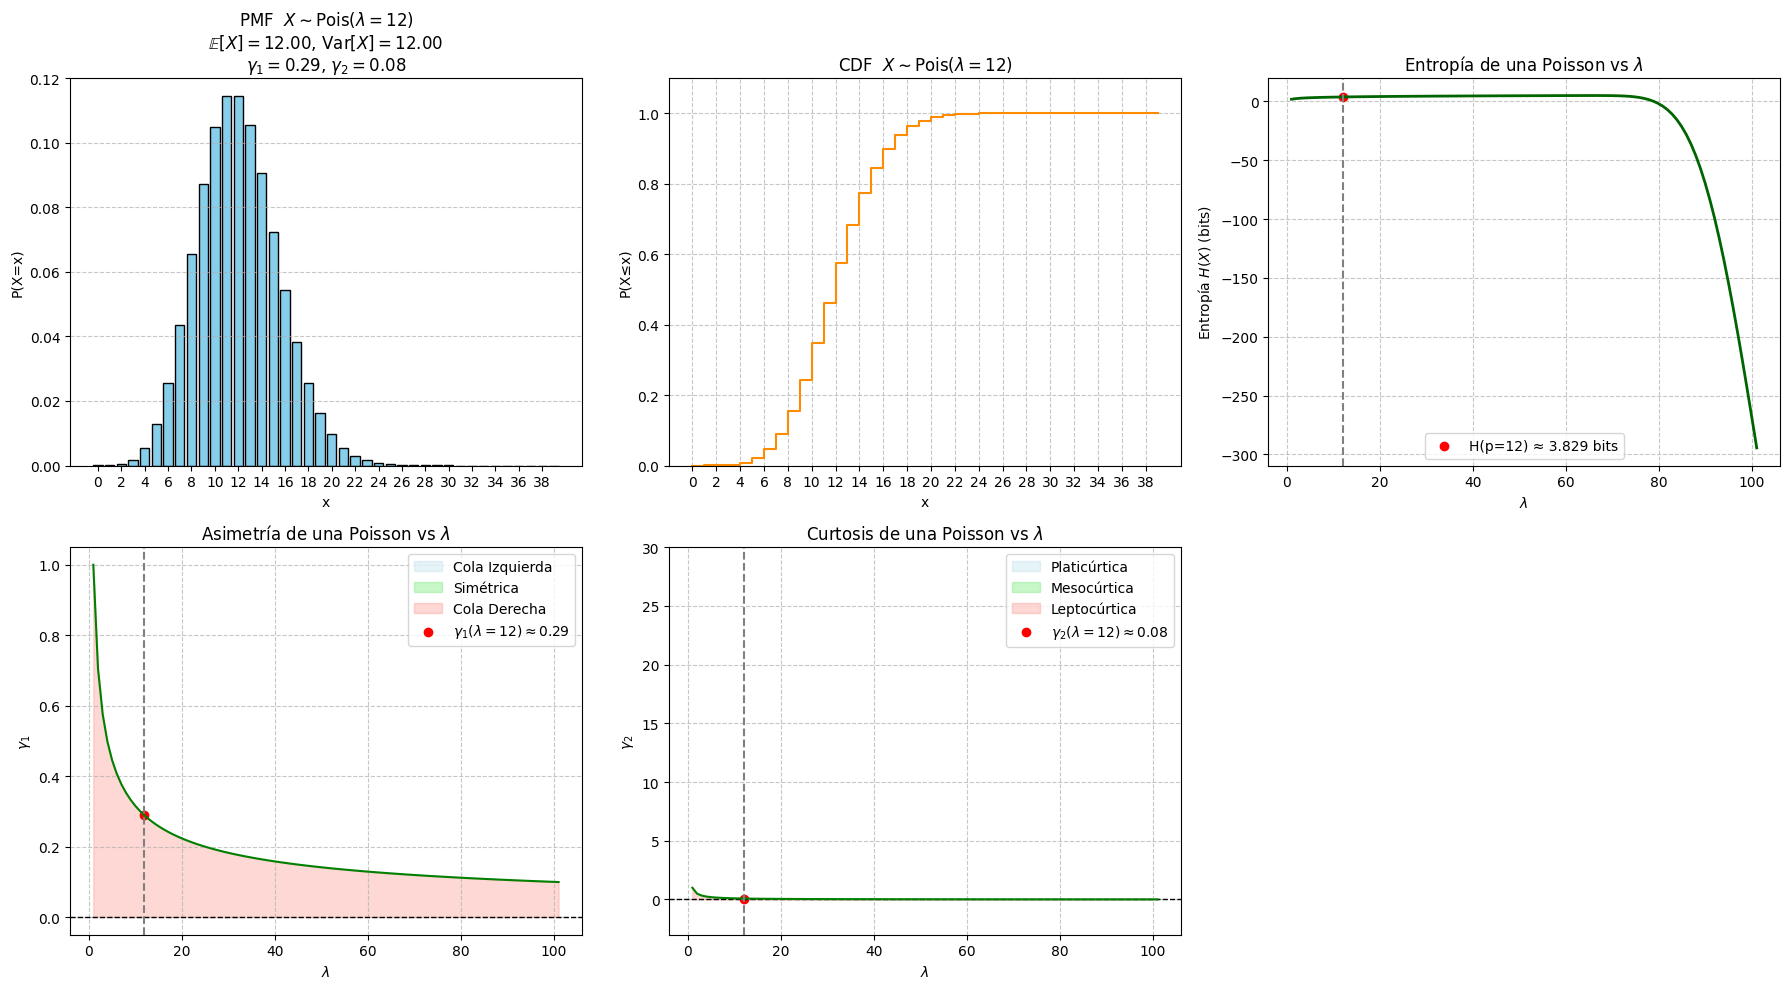

In [6]:
# Definimos los Parametros de la Distribucion

lambda_param = 12

# Definimos la Distribucion Aleatoria 

rv = poisson(lambda_param)

# Definimos el Dominio

x =  np.arange(0, 40)

# Definimos las Funciones PMF y CDF

pmf_vals = rv.pmf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

lambda_vals = np.linspace(1, 101, 100)

def sumatory(lmbda, max_x = 100):
    x = np.arange(0, max_x + 1)
    
    num = lmbda**x * gammaln(x + 1)
    den = factorial(x, exact = False)
    
    return np.sum(num / den)

entropy = rv.entropy() / np.log(2)
H_vals = [lambda_val * (1 - np.log(lambda_val)) + np.exp(-lambda_val) * sumatory(lambda_val, max_x = 100) for lambda_val in lambda_vals]
H_vals = [val / np.log(2) for val in H_vals]

# Asimetria 

asymmetry_p  = 1 / np.sqrt(lambda_param)
asymmetry_vals  = 1 / np.sqrt(lambda_vals)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 1 / lambda_param
kurtosis_vals = 1 / lambda_vals

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].bar(x, pmf_vals, color = 'skyblue', edgecolor = 'black')
axs[0, 0].set_title(f'PMF  $X \\sim \\text{{Pois}}(\\lambda={lambda_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('P(X=x)')
axs[0, 0].set_xticks(x[::2])
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.7)

axs[0, 1].step(x, cdf_vals, where = 'post', color = 'darkorange')
axs[0, 1].set_title(f'CDF  $X \\sim \\text{{Pois}}(\\lambda={lambda_param})$')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('P(X≤x)')
axs[0, 1].set_xticks(x[::2])
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(lambda_vals, H_vals, color = 'darkgreen', lw = 2)
axs[0, 2].axvline(lambda_param, color = 'gray', linestyle = '--')
axs[0, 2].scatter(lambda_param, entropy, color = 'red', label = f'H(p={lambda_param}) ≈ {entropy:.3f} bits')
axs[0, 2].set_title('Entropía de una Poisson vs $\\lambda$')
axs[0, 2].set_xlabel('$\\lambda$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(lambda_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(lambda_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(lambda_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 0].plot(lambda_vals, asymmetry_vals, color = 'green')
axs[1, 0].axvline(lambda_param, color = 'gray', linestyle = '--')
axs[1, 0].scatter(lambda_param, asymmetry_p, color = 'red', label = f'$\\gamma_1(\lambda={lambda_param}) \\approx {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetría de una Poisson vs $\\lambda$')
axs[1, 0].set_xlabel('$\\lambda$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(lambda_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(lambda_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(lambda_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].plot(lambda_vals, kurtosis_vals, color = 'green')
axs[1, 1].axvline(lambda_param, color = 'gray', linestyle = '--')
axs[1, 1].scatter(lambda_param, kurtosis_p, color = 'red', label = f'$\\gamma_2(\lambda={lambda_param}) \\approx {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Poisson vs $\\lambda$')
axs[1, 1].set_xlabel('$\\lambda$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-3, 30)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

# **Continuas**

### **Uniforme**

Una **variable aleatoria Uniforme** $X$ es una variable continua que **modela unos eventos continuos que tienen la misma probabilidad de ocurrir en cualquier punto dentro de un intervalo fijo $[a, b]$**

**Parametros** 

* **Intervalo**: $a, b$

$$-\infty < a < b < \infty$$

**Simbologia** 

$$X \sim {\displaystyle U}(a, b)$$

**Dominio** 

$$x \in [a, b]$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \begin{cases} \frac{1}{b - a} & \text{si } x \in [a, b]\\0 & \text{otherwise}\end{cases}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \begin{cases} 0 & \text{si } x < a\\\frac{x - a}{b - a} & \text{si } x \in [a, b]\\1 & \text{si } x > b \end{cases}$$

**Valor Esperado** 

$$E[X] = \frac{1}{2} (a + b)$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{1}{12} (b - a)^2$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = 0$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = -\frac{6}{5}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \text{log}(b - a)$$

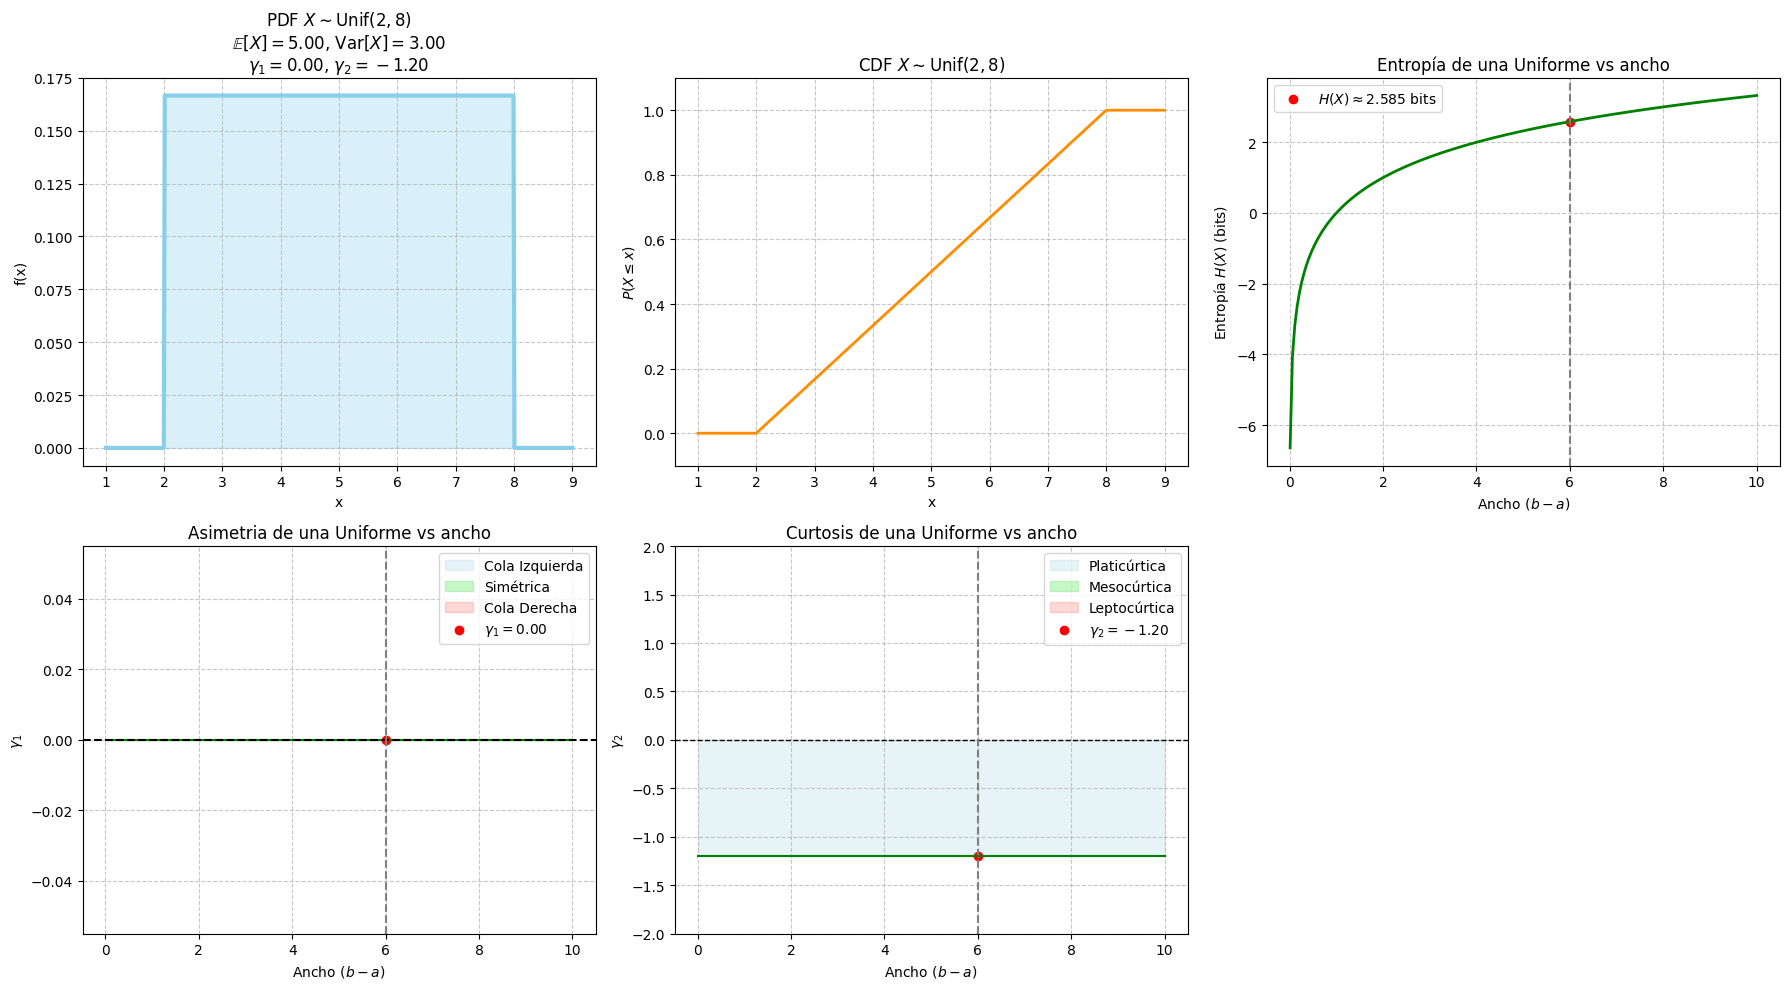

In [7]:
# Definimos los Parametros de la Distribucion

a = 2
b = 8

# Definimos la Distribucion Aleatoria 

rv = uniform(loc = a, scale = b - a)

# Definimos el Dominio

x = np.linspace(a - 1, b + 1, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

width_vals = np.linspace(0.01, 10, 200)

entropy = rv.entropy() / np.log(2)
H_vals = np.log(width_vals) / np.log(2)

# Asimetria 

asymmetry_p  = 0
asymmetry_vals = np.zeros_like(width_vals)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = -6/5
kurtosis_vals = np.full_like(width_vals, -6/5)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim \\text{{Unif}}({a}, {b})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim \\text{{Unif}}({a}, {b})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(width_vals, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(b - a, color = 'gray', linestyle = '--')
axs[0, 2].scatter(b - a, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title('Entropía de una Uniforme vs ancho')
axs[0, 2].set_xlabel('Ancho $(b - a)$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(width_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(width_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(width_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].plot(width_vals, asymmetry_vals, color = 'green')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].axvline(b - a, color = 'gray', linestyle = '--')
axs[1, 0].scatter(b - a, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetria de una Uniforme vs ancho')
axs[1, 0].set_xlabel('Ancho $(b - a)$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(width_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(width_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(width_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].axvline(b - a, color = 'gray', linestyle = '--')
axs[1, 1].plot(width_vals, kurtosis_vals, color = 'green')
axs[1, 1].scatter(b - a, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Uniforme vs ancho')
axs[1, 1].set_xlabel('Ancho $(b - a)$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 2)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Normal**

Una **variable aleatoria Normal** $X$ es una variable continua que **modela fenomenos naturales donde los valores se distribuyen simetricamente alrededor de una media $\mu$**, con mayor probabilidad de ocurrencia cerca de la media

**Parametros** 

* **Media**: $\mu$

$$\mu \in \mathbb{R}$$

* **Varianza**: $\sigma^2$

$$\sigma^2 > 0$$

**Simbologia** 

$$X \sim {\displaystyle {\mathcal {N}}(\mu ,\sigma ^{2})}$$

**Dominio** 

$$
{\displaystyle x\in \mathbb {R} }$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \Phi\left(\frac{x - \mu}{\sigma}\right)$$

**Valor Esperado** 

$$E[X] = \mu$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \sigma^2$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = 0$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = 0$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \frac{1}{2} \text{log}(2 \cdot \pi \cdot e \cdot \sigma^2)$$

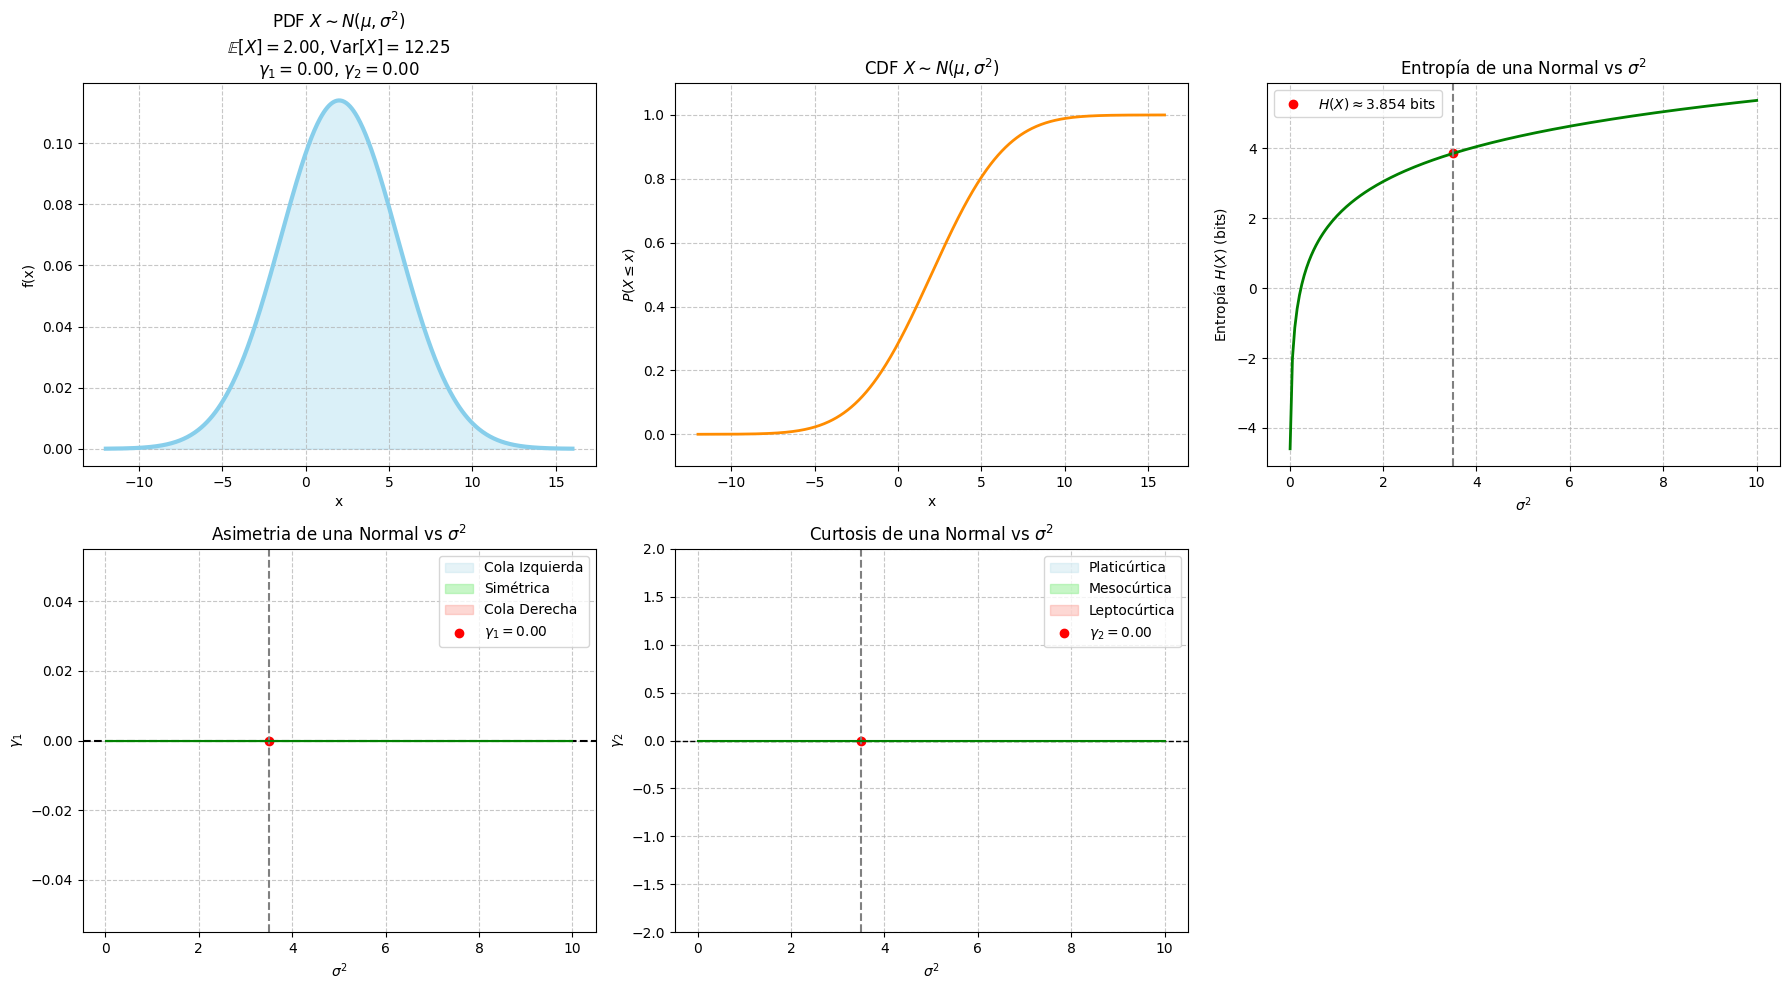

In [8]:
# Definimos los Parametros de la Distribucion

mu = 2
sigma = 3.5

# Definimos la Distribucion Aleatoria 

rv = norm(loc = mu, scale = sigma)

# Definimos el Dominio

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

variance = np.linspace(0.01, 10, 200)

entropy = rv.entropy() / np.log(2)
H_vals = (0.5 * np.log(2 * np.pi * np.e * variance**2)) / np.log(2)

# Asimetria 

asymmetry_p  = 0
asymmetry_vals = np.zeros_like(variance)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 0
kurtosis_vals = np.zeros_like(variance)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \sim N(\mu ,\sigma ^{2})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \sim N(\mu ,\sigma ^{2})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(variance, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(sigma, color = 'gray', linestyle = '--')
axs[0, 2].scatter(sigma, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title('Entropía de una Normal vs $\sigma^2$')
axs[0, 2].set_xlabel('$\sigma^2$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(variance, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(variance, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(variance, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].axvline(sigma, color = 'gray', linestyle = '--')
axs[1, 0].plot(variance, asymmetry_vals, color = 'green')
axs[1, 0].scatter(sigma, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetria de una Normal vs $\sigma^2$')
axs[1, 0].set_xlabel('$\sigma^2$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(variance, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(variance, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(variance, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].axvline(sigma, color = 'gray', linestyle = '--')
axs[1, 1].plot(variance, kurtosis_vals, color = 'green')
axs[1, 1].scatter(sigma, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Normal vs $\sigma^2$')
axs[1, 1].set_xlabel('$\sigma^2$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 2)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Beta**

Una **variable aleatoria Beta** $X$ es una variable continua que **modela fenomenos definidos en un intervalor fijo $[0, 1]$**, donde la probabilidad depende de los parametros $\alpha$ y $\beta$

**Parametros** 

* **Alpha**: $\alpha$

$$\alpha > 0$$

* **Beta**: $\beta$

$$\beta > 0$$

**Simbologia** 

$$X \sim \text{Beta}(\alpha ,\beta)$$

**Dominio** 

$$x \in [0, 1]$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{{B(\alpha, \beta)}} = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = I_x(\alpha, \beta)$$

**Valor Esperado** 

$$E[X] = \frac{\alpha}{\alpha + \beta}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{2 (\beta - \alpha) \sqrt{\alpha + \beta + 1}}{(\alpha + \beta + 2) \sqrt{\alpha \beta}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{6 \left[(\alpha - \beta)^2 (\alpha + \beta + 1) - \alpha \beta(\alpha + \beta + 2)\right]}{\alpha\beta(\alpha + \beta + 2)(\alpha + \beta + 3)}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)


**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = {\displaystyle {\begin{matrix}\log \mathrm {B} (\alpha ,\beta )-(\alpha -1)\psi (\alpha )-(\beta -1)\psi (\beta ) + (\alpha +\beta -2)\psi (\alpha +\beta )\end{matrix}}}$$

**Nota:** 

La funcion $I_z(a, b)$ es la **funcion beta incompleta regularizada** definida como: 

$$I_z(a, b) = \frac{B(z; a, b)}{B(a, b)}$$

* En donde $B(z; a, b) = \int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt$ es la **funcion beta incompleta** y $B(a, b) = \int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$ es la **funcion beta completa** y $\Gamma(x)$ no es mas que la **funcion gamma**

La funcion $\psi(x)$ es la **funcion digamma** definida como: 

$$\psi(x) = \frac{d}{dx} \text{log} \left(\Gamma(x)\right) = \frac{\Gamma'(x)}{\Gamma(x)}$$

* En donde $\Gamma(x)$ no es mas que la **funcion gamma**

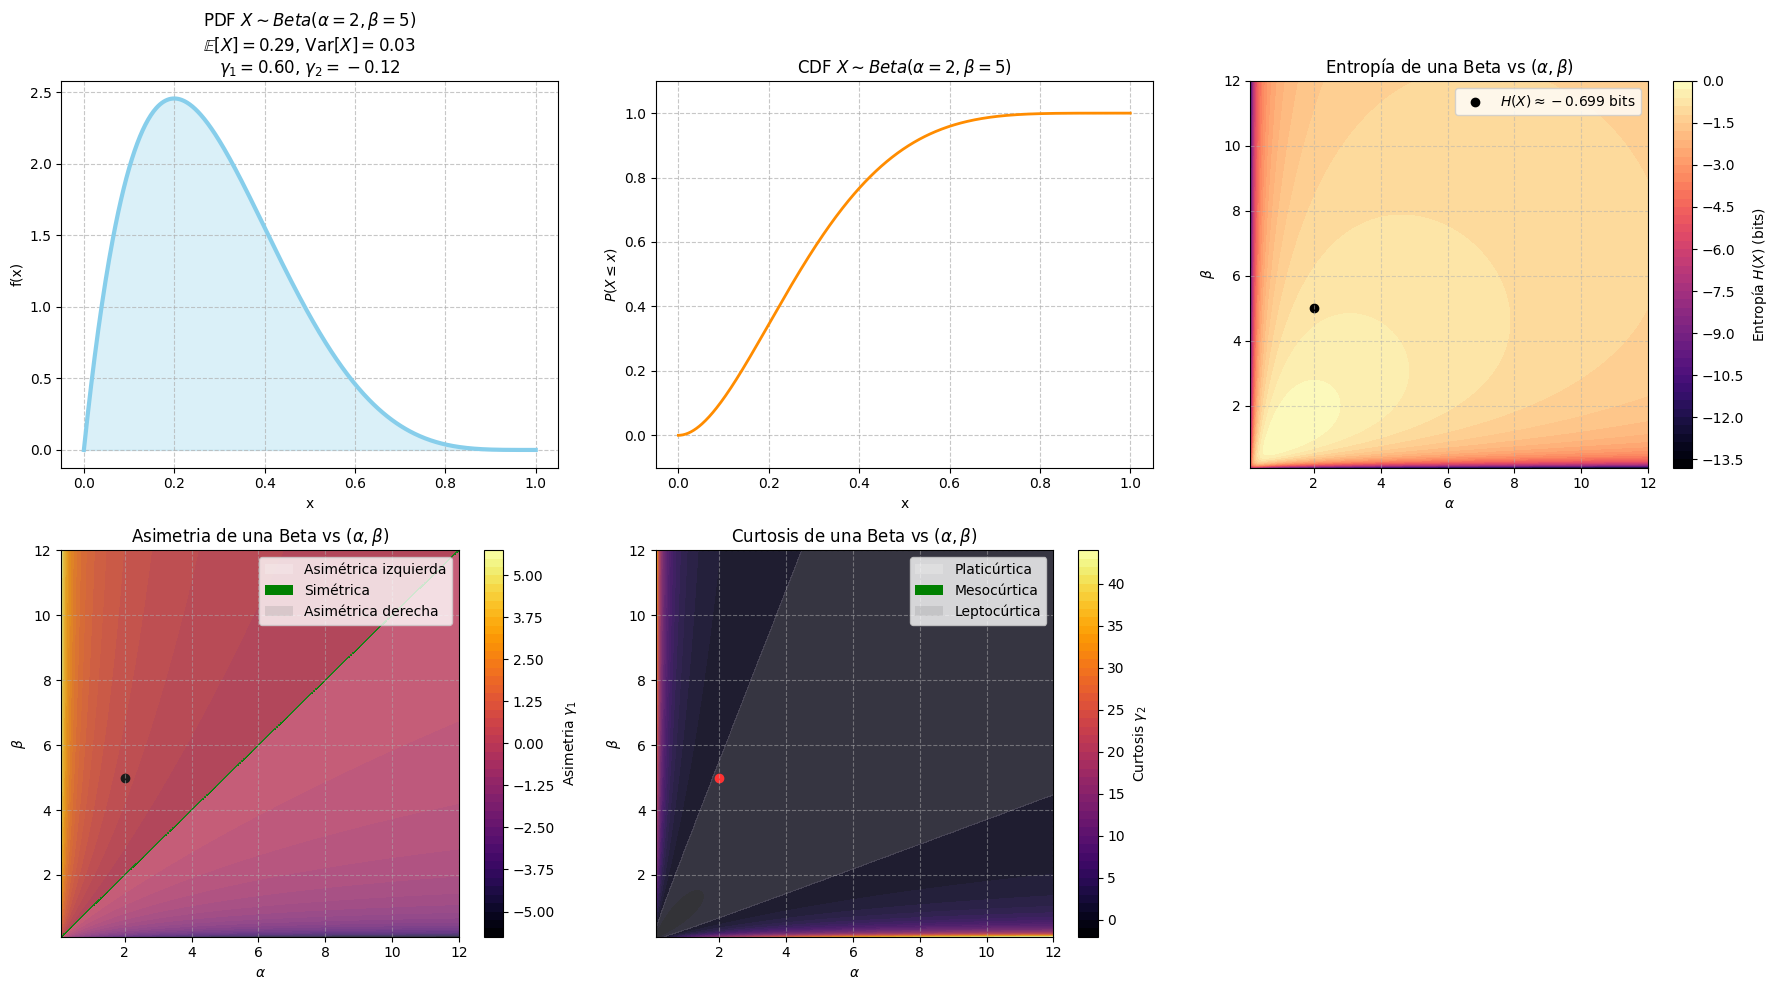

In [9]:
# Definimos los Parametros de la Distribucion

alpha_param = 2
beta_param = 5

# Definimos la Distribucion Aleatoria 

rv = beta(a = alpha_param, b = beta_param)

# Definimos el Dominio

x = np.linspace(0, 1, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

alpha_vals = np.linspace(0.1, 12, 1000)
beta_vals = np.linspace(0.1, 12, 1000)

Alpha, Beta = np.meshgrid(alpha_vals, beta_vals)

entropy = rv.entropy() / np.log(2)
H_vals = (gammaln(Alpha) + gammaln(Beta) - gammaln(Alpha + Beta) - (Alpha - 1) * psi(Alpha) - (Beta - 1) * psi(Beta) + (Alpha + Beta - 2) * psi(Alpha + Beta)) / np.log(2)

# Asimetria 

asymmetry_p = (2 * (beta_param - alpha_param) * np.sqrt(alpha_param + beta_param + 1)) / ((alpha_param + beta_param + 2) * np.sqrt(alpha_param * beta_param))
asymmetry_vals = (2 * (Beta - Alpha) * np.sqrt(Alpha + Beta + 1)) / ((Alpha + Beta + 2) * np.sqrt(Alpha * Beta))

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = (6 * ((alpha_param - beta_param)**2 * (alpha_param + beta_param + 1) - alpha_param * beta_param * (alpha_param + beta_param + 2))) / (alpha_param * beta_param * (alpha_param + beta_param + 2) * (alpha_param + beta_param + 3))
kurtosis_vals = (6 * ((Alpha - Beta)**2 * (Alpha + Beta + 1) - Alpha * Beta * (Alpha + Beta + 2))) / (Alpha * Beta * (Alpha + Beta + 2) * (Alpha + Beta + 3))

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \sim Beta(\\alpha={alpha_param} ,\\beta = {beta_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \sim Beta(\\alpha={alpha_param} ,\\beta = {beta_param})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

contour = axs[0, 2].contourf(Alpha, Beta, H_vals, levels = 50, cmap = 'magma')
fig.colorbar(contour, ax = axs[0, 2], label = 'Entropía $H(X)$ (bits)')
axs[0, 2].scatter(alpha_param, beta_param, color = 'black', label=f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_xlabel(r'$\alpha$')
axs[0, 2].set_ylabel(r'$\beta$')
axs[0, 2].set_title('Entropía de una Beta vs $(\\alpha, \\beta)$')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.5)

contour = axs[1, 0].contourf(Alpha, Beta, asymmetry_vals, levels = 50, cmap = 'inferno')
fig.colorbar(contour, ax = axs[1, 0], label = 'Asimetria $\\gamma_1$')
axs[1, 0].scatter(alpha_param, beta_param, color = 'black', label=f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_xlabel(r'$\alpha$')
axs[1, 0].set_ylabel(r'$\beta$')
axs[1, 0].set_title('Asimetria de una Beta vs $(\\alpha, \\beta)$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.5)
axs[1, 0].contourf(Alpha, Beta, zona_izquierda, levels = [0.5, 1], colors = 'white' , alpha = 0.2)
axs[1, 0].contourf(Alpha, Beta, zona_simetrica, levels = [0.5, 1], colors = 'green', alpha = 1)
axs[1, 0].contourf(Alpha, Beta, zona_derecha, levels = [0.5, 1], colors = 'gray', alpha = 0.2)
zona_izquierda_patch = Patch(facecolor = 'white', alpha = 0.2, label = 'Asimétrica izquierda')
zona_simetrica_patch = Patch(facecolor = 'green', alpha = 1, label = 'Simétrica')
zona_derecha_patch = Patch(facecolor = 'gray', alpha = 0.2, label = 'Asimétrica derecha')
axs[1, 0].legend(handles = [zona_izquierda_patch, zona_simetrica_patch, zona_derecha_patch])

contour = axs[1, 1].contourf(Alpha, Beta, kurtosis_vals, levels = 50, cmap = 'inferno')
fig.colorbar(contour, ax = axs[1, 1], label = 'Curtosis $\\gamma_2$')
axs[1, 1].scatter(alpha_param, beta_param, color = 'red', label=f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_xlabel(r'$\alpha$')
axs[1, 1].set_ylabel(r'$\beta$')
axs[1, 1].set_title('Curtosis de una Beta vs $(\\alpha, \\beta)$')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.5)
axs[1, 1].contourf(Alpha, Beta, zona_platicurtica, levels = [0.5, 1], colors = 'white' , alpha = 0.2)
axs[1, 1].contourf(Alpha, Beta, zona_mesocurtica, levels = [0.5, 1], colors = 'green', alpha = 1)
axs[1, 1].contourf(Alpha, Beta, zona_leptocurtica, levels = [0.5, 1], colors = 'gray', alpha = 0.2)
zona_platicurtica_patch = Patch(facecolor = 'white', alpha = 0.2, label = 'Platicúrtica')
zona_mesocurtica_patch = Patch(facecolor = 'green', alpha = 1, label = 'Mesocúrtica')
zona_leptocurtica_patch = Patch(facecolor = 'gray', alpha = 0.2, label = 'Leptocúrtica')
axs[1, 1].legend(handles = [zona_platicurtica_patch, zona_mesocurtica_patch, zona_leptocurtica_patch])

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Exponencial** 

Una **variable aleatoria Exponencial** $X$ es una variable continua que **modela fenomenos que describen el tiempo hasta que ocurre un evento**.

**Parametros** 

* **Tasa de Ocurrencia**: $\lambda$

$$\lambda > 0$$

**Simbologia** 

$$X \sim \text{exp}(\lambda)$$

**Dominio** 

$$x \in [0, \infty)$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \lambda e^{-\lambda x}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = 1 - e^{-\lambda x}$$

**Valor Esperado** 

$$E[X] = \frac{1}{\lambda}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{1}{\lambda^2}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = 2$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = 6$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = 1 - \text{log}(\lambda)$$

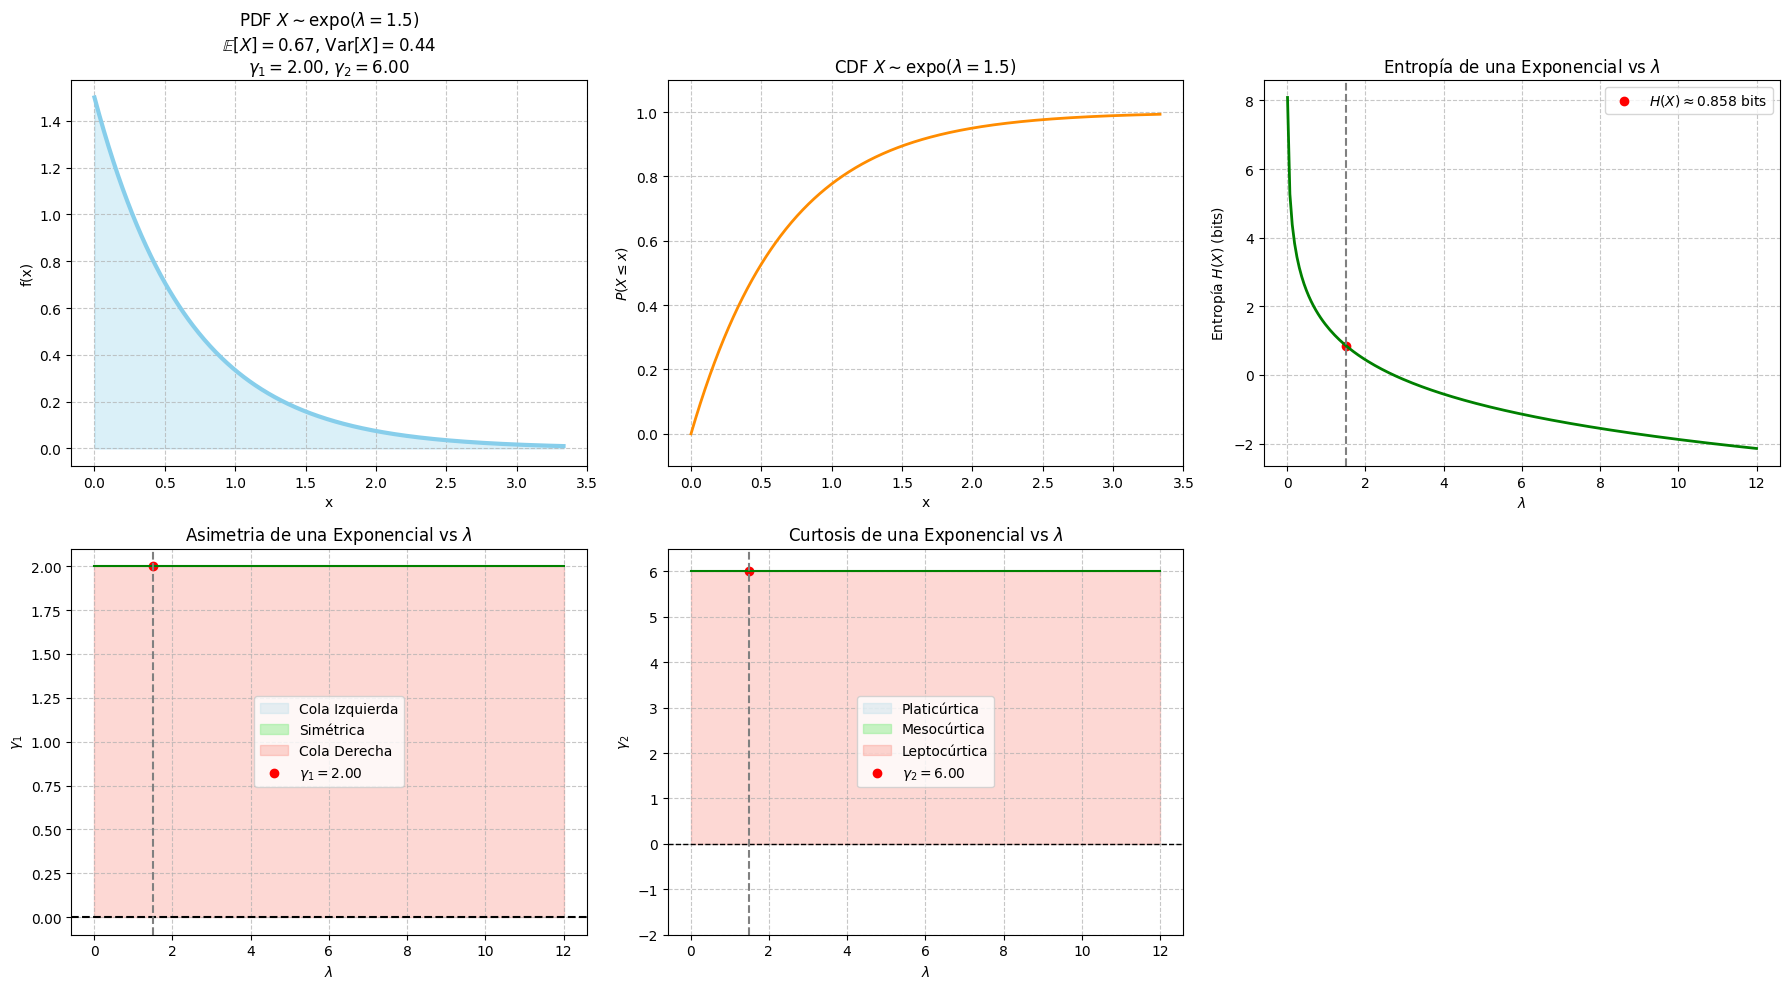

In [10]:
# Definimos los Parametros de la Distribucion

lam = 1.5

# Definimos la Distribucion Aleatoria 

rv = expon(scale = 1/lam) 

# Definimos el Dominio

x = np.linspace(0, 5/lam, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

lambda_vals = np.linspace(0.01, 12, 200)

entropy = rv.entropy() / np.log(2)
H_vals = (1 - np.log(lambda_vals)) / np.log(2)

# Asimetria 

asymmetry_p  = 2
asymmetry_vals = np.full_like(lambda_vals, 2)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 6
kurtosis_vals = np.full_like(lambda_vals, 6)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim \\text{{expo}}(\lambda = {lam})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim \\text{{expo}}(\lambda = {lam})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(lambda_vals, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(lam, color = 'gray', linestyle = '--')
axs[0, 2].scatter(lam, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title('Entropía de una Exponencial vs $\lambda$')
axs[0, 2].set_xlabel('$\lambda$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(lambda_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(lambda_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(lambda_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].plot(lambda_vals, asymmetry_vals, color = 'green')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].axvline(lam, color = 'gray', linestyle = '--')
axs[1, 0].scatter(lam, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetria de una Exponencial vs $\lambda$')
axs[1, 0].set_xlabel('$\lambda$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(lambda_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(lambda_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(lambda_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].plot(lambda_vals, kurtosis_vals, color = 'green')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].axvline(lam, color = 'gray', linestyle = '--')
axs[1, 1].scatter(lam, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Exponencial vs $\lambda$')
axs[1, 1].set_xlabel('$\lambda$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 6.5)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Gamma**

Una **variable aleatoria Gamma** $X$ es una variable continua que **modela fenomenos que representan tiempos de espera hasta que ocurren multiples eventos independientes**.

**Parametros** 

* **Parametro de Forma**: $\alpha$

$$\alpha > 0$$

* **Tasa de Ocurrencia**: $\lambda$ 

$$\lambda > 0$$

**Simbologia** 

$$X \sim \Gamma(\alpha, \lambda)$$

**Dominio** 

$$x \in [0, \infty)$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{\lambda^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\lambda x}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \frac{1}{\Gamma(\alpha)} \gamma(\alpha, \lambda x)$$

**Valor Esperado** 

$$E[X] = \frac{\alpha}{\lambda}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{\alpha}{\lambda^2}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{2}{\sqrt{\alpha}}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{6}{\alpha}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \alpha - \text{log}(\lambda) + \text{log}(\Gamma(\alpha)) + (1 - \alpha) \cdot \psi(\alpha)$$

**Nota:** 

La funcion $\psi(x)$ es la **funcion digamma** definida como: 

$$\psi(x) = \frac{d}{dx} \text{log} \left(\Gamma(x)\right) = \frac{\Gamma'(x)}{\Gamma(x)}$$

* En donde $\Gamma(x)$ no es mas que la **funcion gamma**

La funcion $\gamma(a, x)$ es la **funcion gamma incompleta inferior** definida como: 

$$\gamma(a, x) = \int_0^x t^{a - 1} \cdot e^{-t} \cdot dt$$



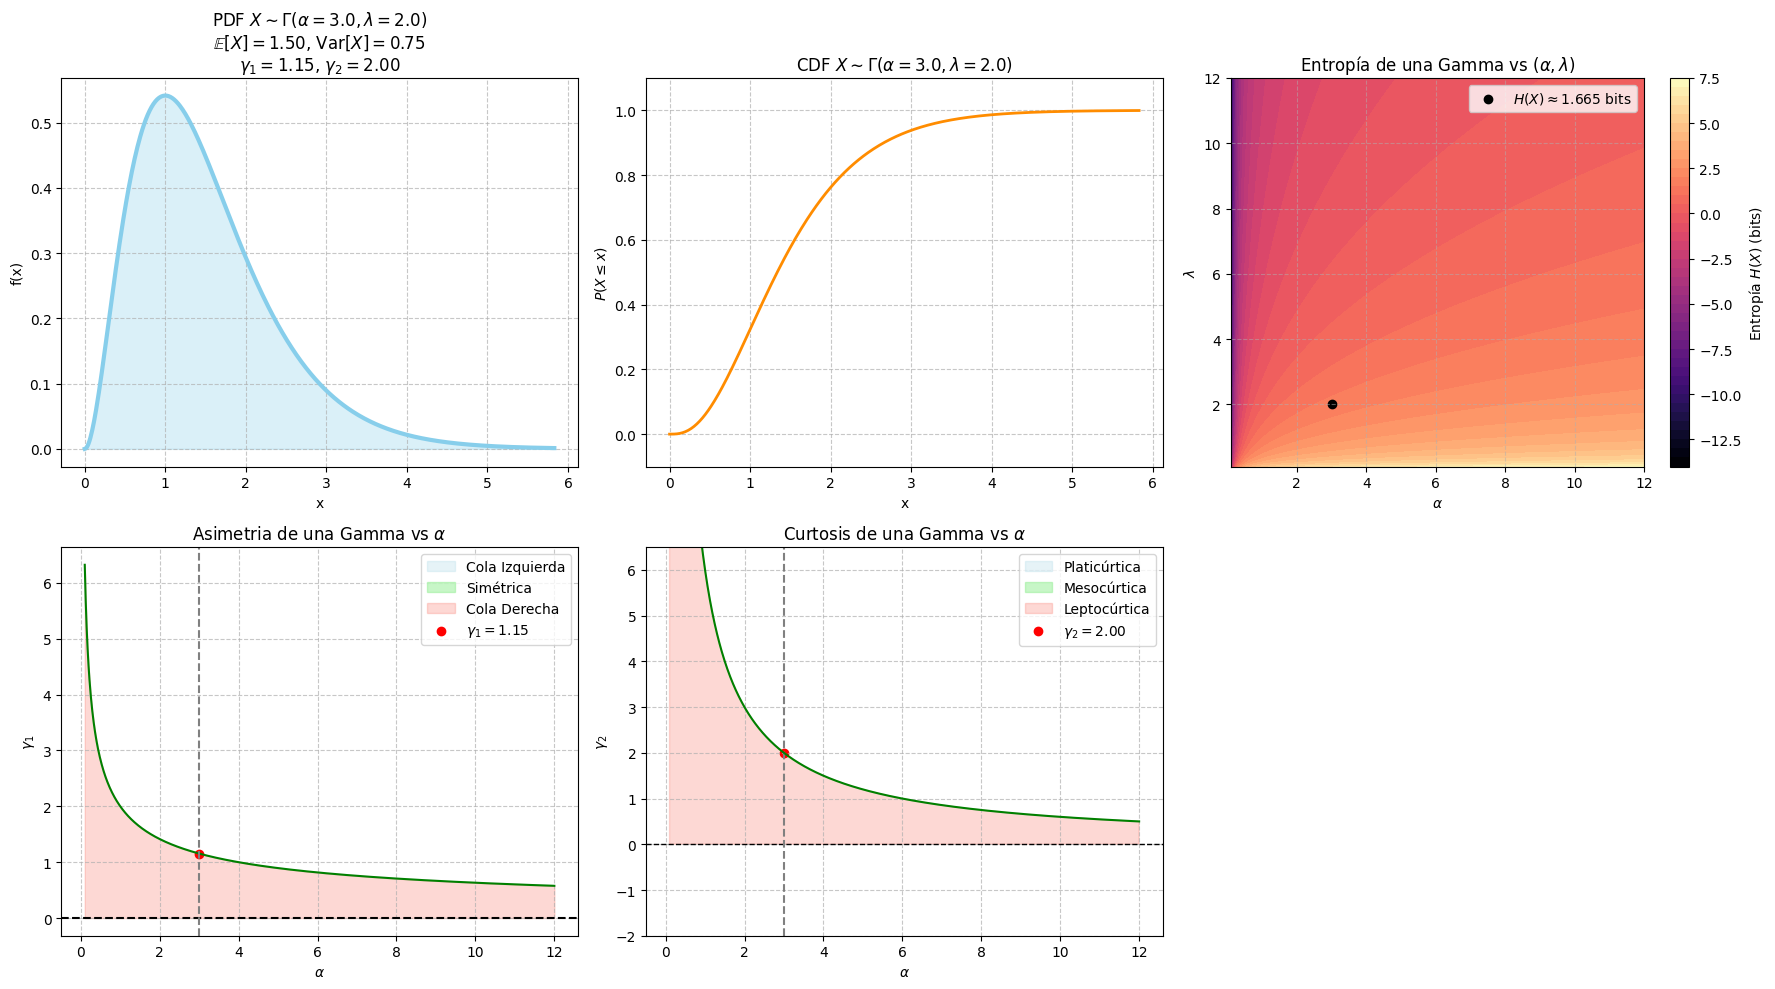

In [11]:
# Definimos los Parametros de la Distribucion

alpha = 3.0
lam = 2.0

# Definimos la Distribucion Aleatoria 

rv = gamma(a = alpha, scale = 1/lam)

# Definimos el Dominio

x = np.linspace(0, (alpha + 5*np.sqrt(alpha)) * (1/lam), 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

alpha_vals = np.linspace(0.1, 12, 1000)
lambda_vals = np.linspace(0.1, 12, 1000)

Alpha, Lambdas = np.meshgrid(alpha_vals, lambda_vals)

entropy = rv.entropy() / np.log(2)
H_vals = (Alpha - np.log(Lambdas) + np.log(gammafn(Alpha)) + (1 - Alpha) * psi(Alpha)) / np.log(2)

# Asimetria 

asymmetry_p  = 2 / np.sqrt(alpha)
asymmetry_vals = 2 / np.sqrt(alpha_vals)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 6 / alpha
kurtosis_vals = 6 / alpha_vals

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim \Gamma(\\alpha = {alpha}, \lambda = {lam})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim \Gamma(\\alpha = {alpha}, \lambda = {lam})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

contour = axs[0, 2].contourf(Alpha, Lambdas, H_vals, levels = 50, cmap = 'magma')
fig.colorbar(contour, ax = axs[0, 2], label = 'Entropía $H(X)$ (bits)')
axs[0, 2].scatter(alpha, lam, color = 'black', label=f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_xlabel(r'$\alpha$')
axs[0, 2].set_ylabel(r'$\lambda$')
axs[0, 2].set_title('Entropía de una Gamma vs $(\\alpha, \\lambda)$')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.5)

axs[1, 0].fill_between(alpha_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(alpha_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(alpha_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].scatter(alpha, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].plot(alpha_vals, asymmetry_vals, color = 'green')
axs[1, 0].axvline(alpha, color = 'gray', linestyle = '--')
axs[1, 0].set_title('Asimetria de una Gamma vs $\\alpha$')
axs[1, 0].set_xlabel('$\\alpha$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(alpha_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(alpha_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(alpha_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].axvline(alpha, color = 'gray', linestyle = '--')
axs[1, 1].plot(alpha_vals, kurtosis_vals, color = 'green')
axs[1, 1].scatter(alpha, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Gamma vs $\\alpha$')
axs[1, 1].set_xlabel('$\\alpha$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 6.5)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **LogNormal**

Una **variable aleatoria LogNormal** $X$ es una variable continua que **modela fenomenos positivos donde los valores crecen de forma multiplicativa o exponencial**.

**Parametros** 

* **Media**: $\mu$

$$\mu \in \mathbb{R}$$

* **Varianza**: $\sigma^2$ 

$$\sigma^2 > 0$$

**Simbologia** 

$$\text{ln}(X) \sim {\displaystyle {\mathcal {N}}(\mu ,\sigma ^{2})}$$

**Dominio** 

$$x \in (0, +\infty)$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x)= \frac{1}{x \sigma \sqrt{2 \pi}} \cdot e^{-\frac{(\text{ln}(x) - \mu)^2}{2 \sigma^2}}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \Phi\left(\frac{\text{ln}(x) - \mu}{\sigma}\right)$$

**Valor Esperado** 

$$E[X] = e^{\left(\mu + \frac{\sigma^2}{2}\right)}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = (e^{\sigma^2} - 1) e^{2\mu + \sigma^2}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = (e^{\sigma^2} + 2) \sqrt{e^{\sigma^2} - 1}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha

**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = e^{4\sigma^2} + 2 e^{3\sigma^2} + 3 e^{2\sigma^2} - 6$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \text{log}(\sqrt{2 \cdot \pi \cdot e} \cdot \sigma \cdot e^{\mu})$$

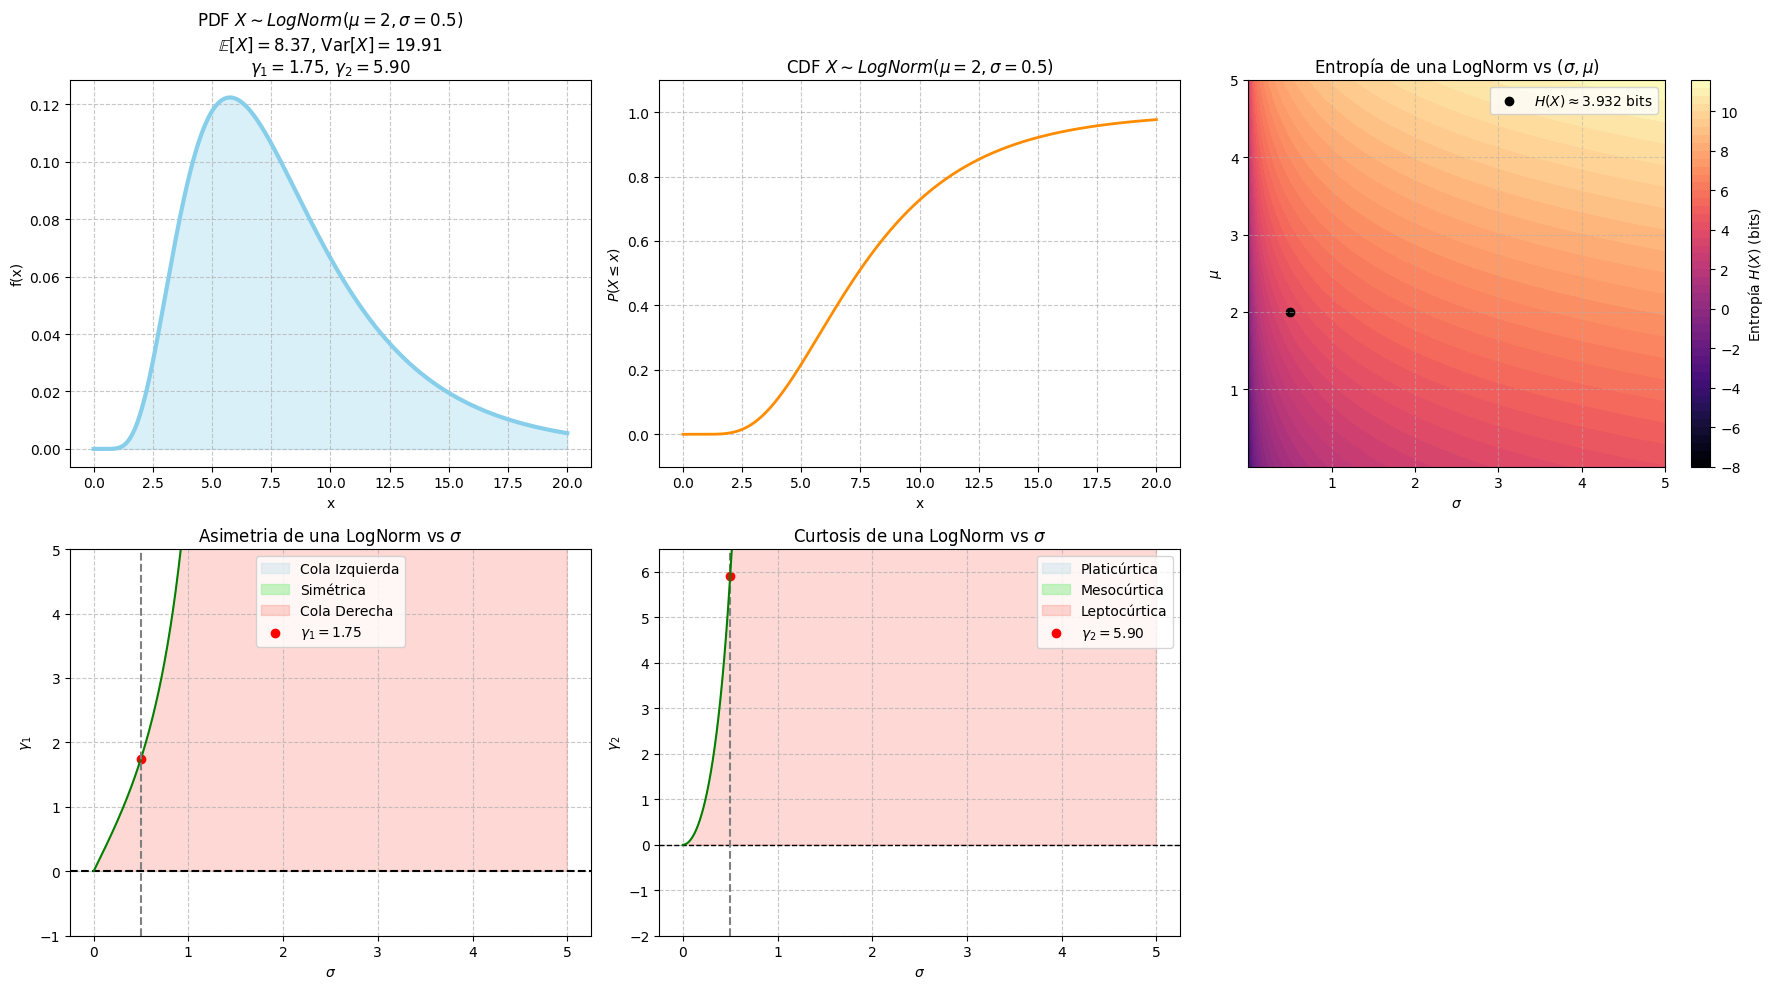

In [12]:
# Definimos los Parametros de la Distribucion

mu = 2    
sigma = 0.5

# Definimos la Distribucion Aleatoria 

rv = lognorm(s = sigma, scale = np.exp(mu))

# Definimos el Dominio

x = np.linspace(0.001, 20, 1000)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

sigma_vals = np.linspace(0.001, 5, 1000)
mean_vals = np.linspace(0.001, 5, 1000)

Sigmas, Means = np.meshgrid(sigma_vals, mean_vals)

entropy = rv.entropy() / np.log(2)
H_vals = (np.log(np.sqrt(2 * np.pi * np.e) * Sigmas * np.exp(Means))) / np.log(2)

# Asimetria 

asymmetry_p  = (np.exp(sigma**2) + 2) * np.sqrt(np.exp(sigma**2) - 1)
asymmetry_vals = (np.exp(sigma_vals**2) + 2) * np.sqrt(np.exp(sigma_vals**2) - 1)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = np.exp(4 * sigma**2) + 2 * np.exp(3 * sigma**2) + 3 * np.exp(2 * sigma**2) - 6
kurtosis_vals = np.exp(4 * sigma_vals**2) + 2 * np.exp(3 * sigma_vals**2) + 3 * np.exp(2 * sigma_vals**2) - 6

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim LogNorm(\\mu = {mu}, \sigma = {sigma})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim LogNorm(\\mu = {mu}, \sigma = {sigma})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

contour = axs[0, 2].contourf(Sigmas, Means, H_vals, levels = 50, cmap = 'magma')
fig.colorbar(contour, ax = axs[0, 2], label = 'Entropía $H(X)$ (bits)')
axs[0, 2].scatter(sigma, mu, color = 'black', label=f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_xlabel(r'$\sigma$')
axs[0, 2].set_ylabel(r'$\mu$')
axs[0, 2].set_title('Entropía de una LogNorm vs $(\\sigma, \\mu)$')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.5)

axs[1, 0].fill_between(sigma_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(sigma_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(sigma_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].scatter(sigma, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].plot(sigma_vals, asymmetry_vals, color = 'green')
axs[1, 0].axvline(sigma, color = 'gray', linestyle = '--')
axs[1, 0].set_title('Asimetria de una LogNorm vs $\\sigma$')
axs[1, 0].set_xlabel('$\\sigma$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].set_ylim(-1, 5)
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(sigma_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(sigma_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(sigma_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].axvline(sigma, color = 'gray', linestyle = '--')
axs[1, 1].plot(sigma_vals, kurtosis_vals, color = 'green')
axs[1, 1].scatter(sigma, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una LogNorm vs $\\sigma$')
axs[1, 1].set_xlabel('$\\sigma$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 6.5)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Logistica**

Una **variable aleatoria Logistica** $X$ es una variable continua que **modela fenomenos con crecimiento rapido seguido de saturacion**.

**Parametros** 

* **Locacion**: $\mu$

$$\mu \in \mathbb{R}$$

* **Escala**: $s$ 

$$s > 0$$

**Simbologia** 

$$X \sim \text{Logistic}(\mu, s)$$

**Dominio** 

$${\displaystyle x \in \mathbb{R} }$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{e^{-\frac{x - \mu}{s}}}{s \left(1 + e^{-\frac{x - \mu}{s}} \right)^2}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \frac{1}{1 + e^{-\frac{x - \mu}{s}}}$$

**Valor Esperado** 

$$E[X] = \mu$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{s^2 \pi^2}{3}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = 0$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{6}{5}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \text{log}(s) + 2 $$

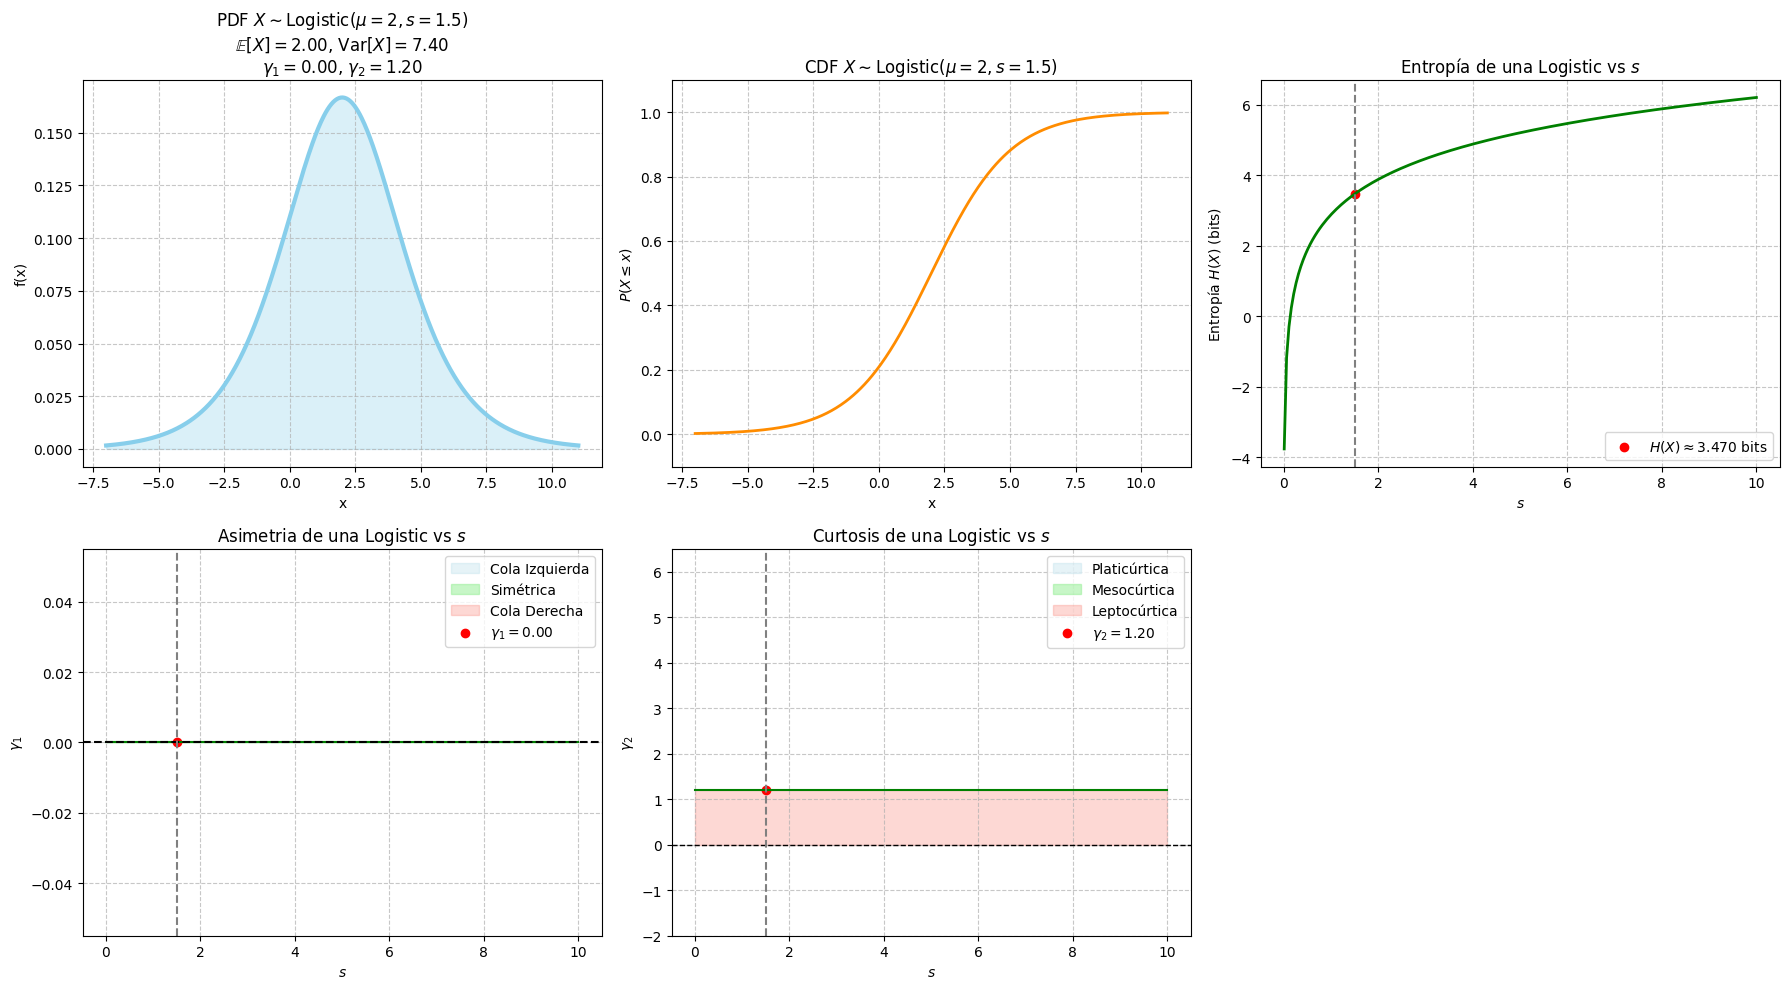

In [13]:
# Definimos los Parametros de la Distribucion

mu = 2
s = 1.5

# Definimos la Distribucion Aleatoria 

rv = logistic(loc = mu, scale = s) 

# Definimos el Dominio

x = np.linspace(mu - 6*s, mu + 6*s, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

s_vals = np.linspace(0.01, 10, 200)

entropy = rv.entropy() / np.log(2)
H_vals = (np.log(s_vals) + 2) / np.log(2)

# Asimetria 

asymmetry_p  = 0
asymmetry_vals = np.zeros_like(s_vals)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 6/5
kurtosis_vals = np.full_like(s_vals, 6/5)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim \\text{{Logistic}}(\mu = {mu}, s={s})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim \\text{{Logistic}}(\mu = {mu}, s={s})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(s_vals, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(s, color = 'gray', linestyle = '--')
axs[0, 2].scatter(s, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title('Entropía de una Logistic vs $s$')
axs[0, 2].set_xlabel('$s$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(s_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(s_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(s_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].plot(s_vals, asymmetry_vals, color = 'green')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].axvline(s, color = 'gray', linestyle = '--')
axs[1, 0].scatter(s, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetria de una Logistic vs $s$')
axs[1, 0].set_xlabel('$s$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(s_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(s_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(s_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].plot(s_vals, kurtosis_vals, color = 'green')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].scatter(s, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].set_title('Curtosis de una Logistic vs $s$')
axs[1, 1].axvline(s, color = 'gray', linestyle = '--')
axs[1, 1].set_xlabel('$s$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 6.5)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Laplace**

Una **variable aleatoria Laplace** $X$ es una variable continua que **modela fenomenos con cambios bruscos o distribuciones con colas mas pesadas que la normal**.

**Parametros** 

* **Locacion**: $\mu$

$$\mu \in \mathbb{R}$$

* **Escala**: $b$ 

$$b > 0$$

**Simbologia** 

$$X \sim \text{Laplace}(\mu, b)$$

**Dominio** 

$${\displaystyle x\in \mathbb {R} }$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{1}{2b} e^{-\frac{|x - \mu|}{b}}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \begin{cases} \frac{1}{2} e^{\frac{x - \mu}{b}} & \text{si } x \leq \mu\\1 - \frac{1}{2} e^{-\frac{x - \mu}{b}} & \text{si } x \geq \mu \end{cases}$$

**Valor Esperado** 

$$E[X] = \mu$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = 2b^2$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = 0$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = 3$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \text{log}(2 \cdot b \cdot e)$$

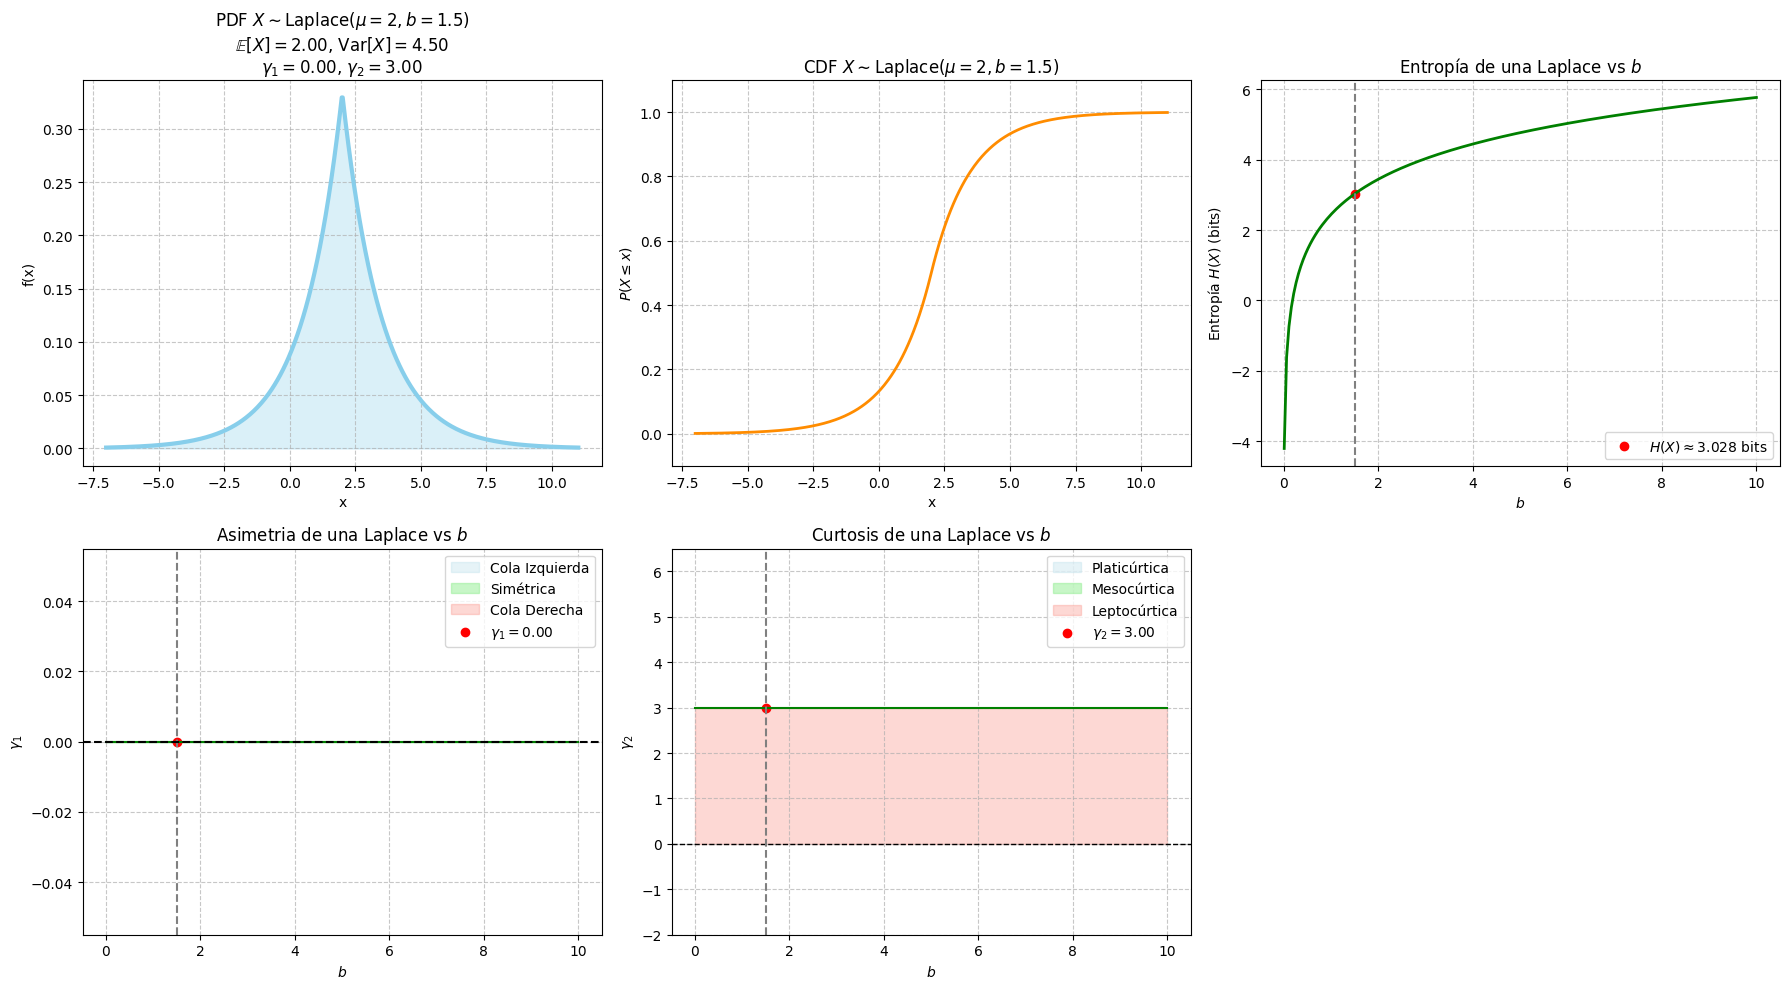

In [14]:
# Definimos los Parametros de la Distribucion

mu = 2
b = 1.5

# Definimos la Distribucion Aleatoria 

rv = laplace(loc = mu, scale = b)

# Definimos el Dominio

x = np.linspace(mu - 6*b, mu + 6*b, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

b_vals = np.linspace(0.01, 10, 200)

entropy = rv.entropy() / np.log(2)
H_vals = (np.log(2 * b_vals * np.e)) / np.log(2)

# Asimetria 

asymmetry_p  = 0
asymmetry_vals = np.zeros_like(b_vals)

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 3
kurtosis_vals = np.full_like(b_vals, 3)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim \\text{{Laplace}}(\mu = {mu}, b={b})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim \\text{{Laplace}}(\mu = {mu}, b={b})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(b_vals, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(b, color = 'gray', linestyle = '--')
axs[0, 2].scatter(b, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title('Entropía de una Laplace vs $b$')
axs[0, 2].set_xlabel('$b$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(b_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(b_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(b_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].plot(b_vals, asymmetry_vals, color = 'green')
axs[1, 0].axvline(b, color = 'gray', linestyle = '--')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].scatter(b, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title('Asimetria de una Laplace vs $b$')
axs[1, 0].set_xlabel('$b$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(b_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(b_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(b_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].plot(b_vals, kurtosis_vals, color = 'green')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].scatter(b, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].axvline(b, color = 'gray', linestyle = '--')
axs[1, 1].set_title('Curtosis de una Laplace vs $b$')
axs[1, 1].set_xlabel('$b$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 6.5)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **Gumbel**

Una **variable aleatoria Gumbel** $X$ es una variable continua que **modela fenomenos extremos, como maximos o minimos de grandes muestras**.

**Parametros** 

* **Locacion**: $\mu$

$$\mu \in \mathbb{R}$$

* **Escala**: $\beta$ 

$$\beta > 0$$

**Simbologia** 

$$X \sim \text{Gumbel}(\mu, \beta)$$

**Dominio** 

$${\displaystyle x\in \mathbb {R} }$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{1}{\beta} e^{-\left(\frac{x - \mu}{\beta} + e^{-\frac{x - \mu}{\beta}}\right) }$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = e^{-e^{- \left(\frac{x - \mu}{\beta}\right)}}$$

**Valor Esperado** 

$$E[X] = \mu + \beta \gamma$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{\pi^2}{6}\beta^2$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \frac{12 \sqrt{6} \zeta(3)}{\pi^3}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha


**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \frac{12}{5}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = \text{log}(\beta) + \gamma + 1$$

**Nota:** $\gamma$ = 0.57721 es la constante de **Euler-Mascheroni**

$$\gamma = \int_1^{\infty} \left(-\frac{1}{x} + \frac{1}{\lfloor x \rfloor}\right) dx$$

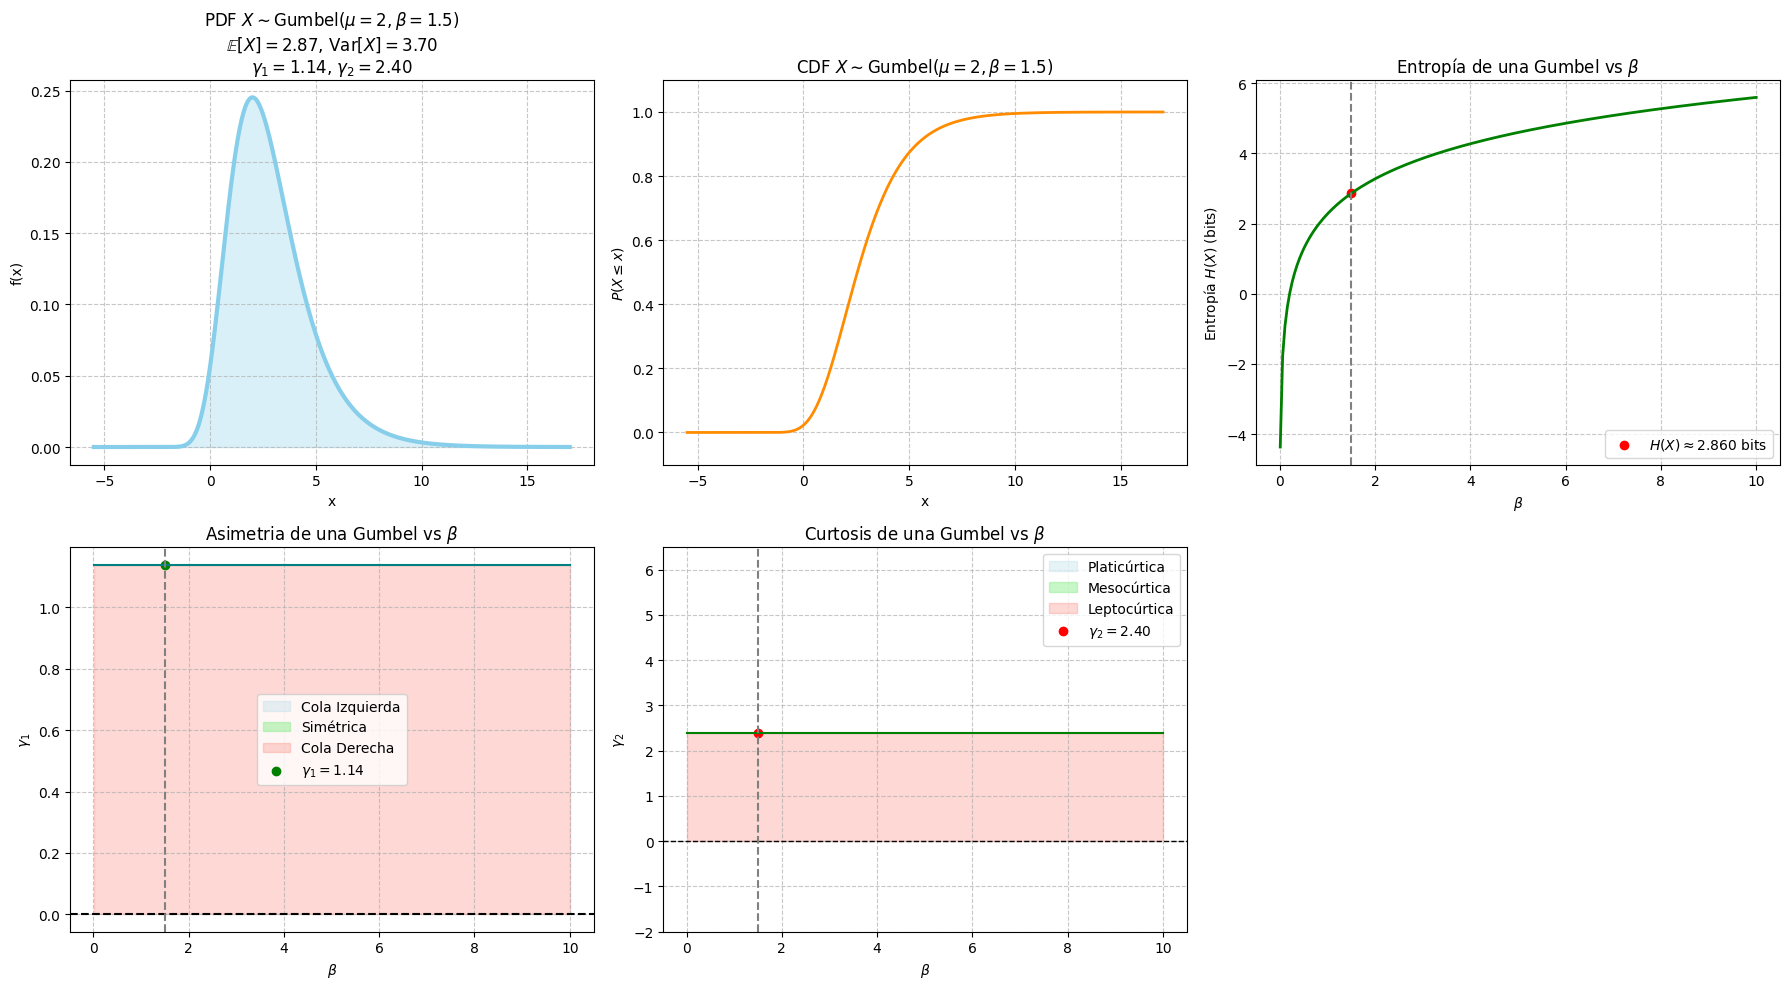

In [15]:
# Definimos los Parametros de la Distribucion

mu = 2
beta_param = 1.5

# Definimos la Distribucion Aleatoria 

rv = gumbel_r(loc = mu, scale = beta_param)

# Definimos el Dominio

x = np.linspace(mu - 5*beta_param, mu + 10*beta_param, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

beta_vals = np.linspace(0.01, 10, 200) 
gamma_constant = 0.5772

entropy = rv.entropy() / np.log(2)
H_vals = (np.log(beta_vals) + gamma_constant + 1) / np.log(2)

# Asimetria 

asymmetry_p  = (12 * np.sqrt(6) * zeta(3, 1)) / (np.pi ** 3)
asymmetry_vals = np.full_like(beta_vals, (12 * np.sqrt(6) * zeta(3, 1)) / (np.pi ** 3))

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 12/5
kurtosis_vals = np.full_like(beta_vals, 12/5)

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim \\text{{Gumbel}}(\mu = {mu}, \\beta={beta_param})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim \\text{{Gumbel}}(\mu = {mu}, \\beta={beta_param})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(beta_vals, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(beta_param, color = 'gray', linestyle = '--')
axs[0, 2].scatter(beta_param, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title(f'Entropía de una Gumbel vs $\\beta$')
axs[0, 2].set_xlabel('$\\beta$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(beta_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(beta_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(beta_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].plot(beta_vals, asymmetry_vals, color = 'teal')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].axvline(beta_param, color = 'gray', linestyle = '--')
axs[1, 0].scatter(beta_param, asymmetry_p, color = 'green', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title(f'Asimetria de una Gumbel vs $\\beta$')
axs[1, 0].set_xlabel('$\\beta$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(beta_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(beta_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(beta_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].plot(beta_vals, kurtosis_vals, color = 'green')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].scatter(beta_param, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].axvline(beta_param, color = 'gray', linestyle = '--')
axs[1, 1].set_title(f'Curtosis de una Gumbel vs $\\beta$')
axs[1, 1].set_xlabel('$\\beta$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 6.5)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **t-Student**

Una **variable aleatoria T-Student** $X$ es una variable continua que **modela fenomenos con datos simetricos alrededor del cero y con colas mas pesadas que las de una normal**.

**Parametros** 

* **Grados de Libertad**: $\nu$

$$\nu > 0$$

**Simbologia** 

$$X \sim \text{t}(\nu)$$

**Dominio** 

$${\displaystyle x\in \mathbb {R}}$$

**Funcion de Densidad de Probabilidad (PDF)**

$$f(x) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\pi \nu} \cdot \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{x^2}{\nu}\right)^{-\frac{\nu + 1}{2}}$$

**Funcion de Distribucion Acumulada (CDF)**

$$F(x) = P(X \leq x) = \frac{1}{2} + x \Gamma\left(\frac{\nu + 1}{2}\right) \frac{{}_{2}\text{F}_1\left(\frac{1}{2}, \frac{\nu + 1}{2}, \frac{3}{2}, -\frac{x^2}{\nu}\right)}{\sqrt{\pi \nu} \hspace{0.1cm}\Gamma(\frac{\nu}{2})}$$

**Valor Esperado** 

$$E[X] = \begin{cases} 0 & \text{si } \nu > 1\\\text{indefinido} & \text{si } \nu \leq 1 \end{cases}$$

**Varianza** 

$$\text{Var}(X) = E[X^2] - E[X]^2 = \begin{cases} \frac{\nu}{\nu - 2} & \text{si } \nu > 2\\\infty  & \text{si } 1 < \nu \leq 2 \\\text{indefinido} & \text{si } \nu \leq 1 \end{cases}$$

**Asimetria** 

$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3} = \begin{cases} 0 & \text{si } \nu > 3\\\text{indefinido} & \text{si } \nu \leq 3 \end{cases}$$

En Donde 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha

**Exceso de Curtosis**

$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3 = \begin{cases} \frac{6}{\nu - 4} & \text{si } \nu > 4\\\infty  & \text{si } 2 < \nu \leq 4 \\\text{indefinido} & \text{si } \nu \leq 2 \end{cases}$$ 

En Donde 

* $\gamma_{2} = 0$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 0$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 0$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)

**Entropia** 

$$H(X) = - \int_{-\infty}^{\infty} f(x) \cdot \text{log}(f(x)) \cdot dx = {\displaystyle {\begin{aligned}&{\frac {\nu +1}{2}}\left[\psi \left({\frac {\nu +1}{2}}\right)-\psi \left({\frac {\nu }{2}}\right)\right]+\log \left[{\sqrt {\nu }}\,\mathrm {B} \left({\frac {\nu }{2}},{\frac {1}{2}}\right)\right]\end{aligned}}}$$

**Nota:** 

La funcion $B(a, b)$ es la **funcion beta** definida como: 

$$B(a, b) = \int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$$

* En donde $\Gamma(x)$ no es mas que la **funcion gamma**

La funcion $\psi(x)$ es la **funcion digamma** definida como: 

$$\psi(x) = \frac{d}{dx} \text{log} \left(\Gamma(x)\right) = \frac{\Gamma'(x)}{\Gamma(x)}$$

* En donde $\Gamma(x)$ no es mas que la **funcion gamma**

La funcion ${}_{2}\text{F}_1(a, b, c, z)$ es la **funcion hipergeometrica** definida como: 

$${}_{2}\text{F}_1(a, b, c, z) = \sum_{n = 0}^{\infty} \frac{a_n \cdot b_n\cdot z^n}{c_n \cdot n!} \quad |z| < 1$$

* En donde $a_n$ es el **simbolo de Pochhammer** $q_n = q \cdot (q + 1) \cdot (q + 2) \cdot \dots \cdot (q + n - 1)$

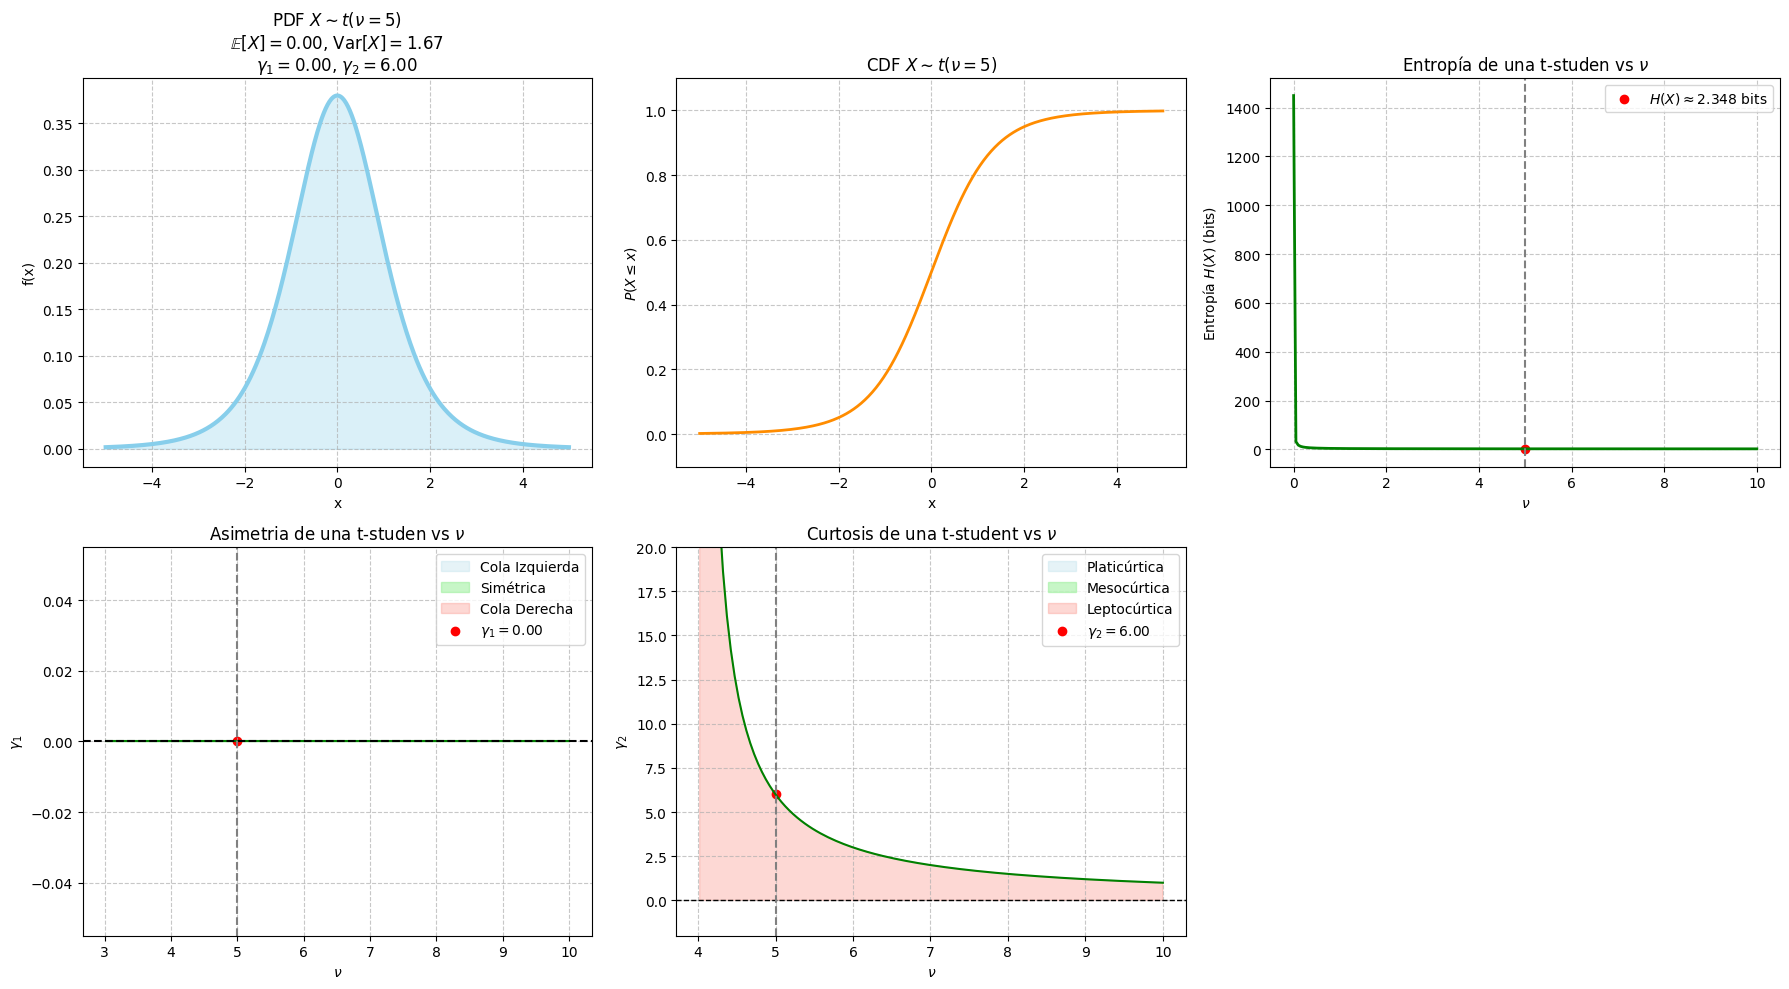

In [16]:
# Definimos los Parametros de la Distribucion

nu = 5

# Definimos la Distribucion Aleatoria 

rv = t(df = nu)

# Definimos el Dominio

x = np.linspace(-5, 5, 500)

# Definimos las Funciones PMF y CDF

pdf_vals = rv.pdf(x)
cdf_vals = rv.cdf(x)

# Calculamos los Distintos Momentos

mean = rv.mean()
var = rv.var()
skew = rv.stats(moments = 's')
kurt = rv.stats(moments = 'k')

# Calculamos la Entropia 

nu_vals = np.linspace(0.001, 10, 200) 

entropy = rv.entropy() / np.log(2)
H_vals = ((nu_vals + 1) / 2 * (psi((nu_vals + 1) / 2) - psi(nu_vals / 2)) + np.log(np.sqrt(nu_vals) * betafn(nu_vals / 2, 0.5))) / np.log(2)

# Asimetria 

asymmetry_p  = 0
asymmetry_vals = np.full_like(nu_vals, np.nan)
asymmetry_vals[nu_vals > 3] = 0

tolerancia = 1e-8
zona_izquierda = asymmetry_vals < -tolerancia
zona_simetrica = np.abs(asymmetry_vals) <= tolerancia
zona_derecha = asymmetry_vals > tolerancia

# Curtosis 

kurtosis_p = 6 / (nu - 4)
kurtosis_vals = np.full_like(nu_vals, np.nan)
kurtosis_vals[nu_vals > 4] = 6 / (nu_vals[nu_vals > 4] - 4)
kurtosis_vals[(nu_vals > 2) & (nu_vals <= 4)] = np.inf

tolerancia = 1e-8
zona_platicurtica = kurtosis_vals < -tolerancia
zona_mesocurtica = np.abs(kurtosis_vals) <= tolerancia
zona_leptocurtica = kurtosis_vals > tolerancia

# Visualizamos

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

axs[0, 0].plot(x, pdf_vals, color = 'skyblue', lw = 3)
axs[0, 0].fill_between(x, pdf_vals, color='skyblue', alpha=0.3)
axs[0, 0].set_title(f'PDF $X \\sim t(\\nu = {nu})$\n' + f'$\\mathbb{{E}}[X]={mean:.2f}$, $\\mathrm{{Var}}[X]={var:.2f}$\n' + f'$\\gamma_1={float(skew):.2f}$, $\\gamma_2={float(kurt):.2f}$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 1].plot(x, cdf_vals, color = 'darkorange', lw = 2)
axs[0, 1].set_title(f'CDF $X \\sim t(\\nu = {nu})$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('$P(X \\leq x)$')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[0, 2].plot(nu_vals, H_vals, color = 'green', lw = 2)
axs[0, 2].axvline(nu, color = 'gray', linestyle = '--')
axs[0, 2].scatter(nu, entropy, color='red',  label = f'$H(X) \\approx {entropy:.3f}$ bits')
axs[0, 2].set_title(f'Entropía de una t-studen vs $\\nu$')
axs[0, 2].set_xlabel('$\\nu$')
axs[0, 2].set_ylabel('Entropía $H(X)$ (bits)')
axs[0, 2].legend()
axs[0, 2].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 0].fill_between(nu_vals, asymmetry_vals, where = zona_izquierda, color = 'lightblue', alpha = 0.3, label = 'Cola Izquierda')
axs[1, 0].fill_between(nu_vals, asymmetry_vals, where = zona_simetrica, color = 'lightgreen', alpha=0.5, label = 'Simétrica')
axs[1, 0].fill_between(nu_vals, asymmetry_vals, where = zona_derecha, color = 'salmon', alpha = 0.3, label = 'Cola Derecha')
axs[1, 0].plot(nu_vals, asymmetry_vals, color = 'green')
axs[1, 0].axhline(0, color = 'black', linestyle = '--')
axs[1, 0].axvline(nu, color = 'gray', linestyle = '--')
axs[1, 0].scatter(nu, asymmetry_p, color = 'red', label = f'$\\gamma_1 = {asymmetry_p:.2f}$')
axs[1, 0].set_title(f'Asimetria de una t-studen vs $\\nu$')
axs[1, 0].set_xlabel('$\\nu$')
axs[1, 0].set_ylabel('$\\gamma_1$')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 1].fill_between(nu_vals, kurtosis_vals, where = zona_platicurtica, color = 'lightblue', alpha = 0.3, label = 'Platicúrtica')
axs[1, 1].fill_between(nu_vals, kurtosis_vals, where = zona_mesocurtica, color = 'lightgreen', alpha = 0.5, label = 'Mesocúrtica')
axs[1, 1].fill_between(nu_vals, kurtosis_vals, where = zona_leptocurtica, color = 'salmon', alpha = 0.3, label = 'Leptocúrtica')
axs[1, 1].plot(nu_vals, kurtosis_vals, color = 'green')
axs[1, 1].axhline(0, color = 'black', linestyle = '--', lw = 1)
axs[1, 1].scatter(nu, kurtosis_p, color = 'red', label = f'$\\gamma_2 = {kurtosis_p:.2f}$')
axs[1, 1].axvline(nu, color = 'gray', linestyle = '--')
axs[1, 1].set_title(f'Curtosis de una t-student vs $\\nu$')
axs[1, 1].set_xlabel('$\\nu$')
axs[1, 1].set_ylabel('$\\gamma_2$')
axs[1, 1].set_ylim(-2, 20)
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

# **Anexos**

### **Funcion Gamma**

$$\Gamma(x) = \int_0^{\infty} t^{x - 1} \cdot e^{-t} dt$$

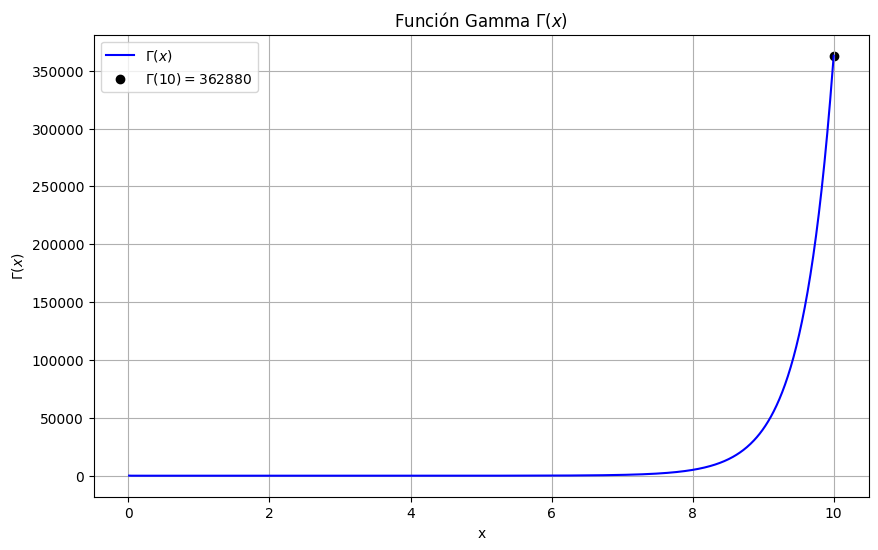

In [17]:
# Definimos el Dominio 

x = np.linspace(0.01, 10, 1000)  

# Calculamos la Funcion Gamma 

y = gammafn(x) 

# Calculamos la Funcion Gamma de un Punto con la Integral (x = 10)

gamma_10, _ = integrate.quad(lambda t: t**(10 - 1) * np.exp(-t), a = 0, b = np.inf)

# Visualizamos 

plt.figure(figsize = (10, 6))

plt.plot(x, y, label = r'$\Gamma(x)$', color = 'blue')
plt.scatter(10, gamma_10, color = 'black', label = f'$\Gamma(10) = {gamma_10: 0.0f}$')
plt.title('Función Gamma $\Gamma(x)$')
plt.xlabel('x')
plt.ylabel(r'$\Gamma(x)$')
plt.grid(True)
plt.legend()

plt.show()

### **Funcion Gamma Incompleta Superior**

$$\Gamma(a, x) = \int_x^{\infty} t^{a - 1} \cdot e^{-t} \cdot dt$$

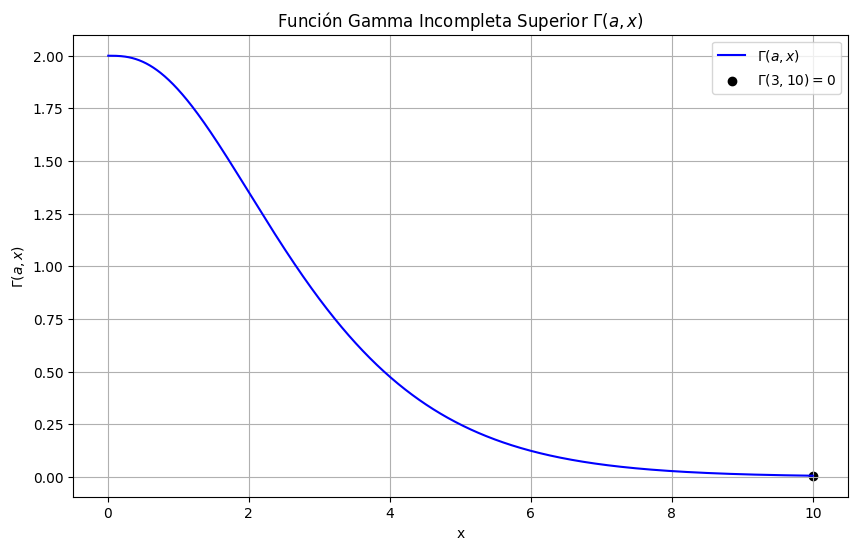

In [18]:
# Definimos el Dominio 

x = np.linspace(0.01, 10, 1000)  
a = 3

# Calculamos la Funcion Gamma Incompleta Superior

y = gammaincfn(a, x) * gammafn(a)

# Calculamos la Funcion Gamma Incompleta Superior de un Punto con la Integral (x = 10, a = 3)

gamma_10_incompleta, _ = integrate.quad(lambda t: t**(a - 1) * np.exp(-t), a = 10, b = np.inf)

# Visualizamos 

plt.figure(figsize = (10, 6))

plt.plot(x, y, label = r'$\Gamma(a, x)$', color = 'blue')
plt.scatter(10, gamma_10_incompleta, color = 'black', label = f'$\Gamma(3, 10) = {gamma_10_incompleta: 0.0f}$')
plt.title('Función Gamma Incompleta Superior $\Gamma(a, x)$')
plt.xlabel('x')
plt.ylabel(r'$\Gamma(a, x)$')
plt.grid(True)
plt.legend()

plt.show()

### **Funcion Gamma Incompleta Inferior**

$$\gamma(a, x) = \int_0^x t^{a - 1} \cdot e^{-t} \cdot dt$$

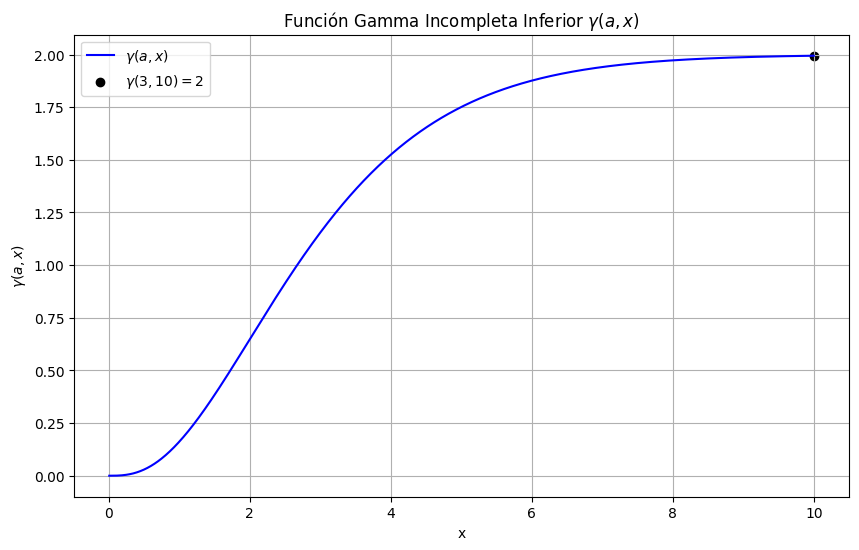

In [19]:
# Definimos el Dominio 

x = np.linspace(0.01, 10, 1000)  
a = 3

# Calculamos la Funcion Gamma Incompleta Inferior

y = gammaincifn(a, x) * gammafn(a)

# Calculamos la Funcion Gamma Incompleta Inferior de un Punto con la Integral (x = 10, a = 3)

gamma_10_incompleta, _ = integrate.quad(lambda t: t**(a - 1) * np.exp(-t), a = 0, b = 10)

# Visualizamos 

plt.figure(figsize = (10, 6))

plt.plot(x, y, label = r'$\gamma(a, x)$', color = 'blue')
plt.scatter(10, gamma_10_incompleta, color = 'black', label = f'$\gamma(3, 10) = {gamma_10_incompleta: 0.0f}$')
plt.title('Función Gamma Incompleta Inferior $\gamma(a, x)$')
plt.xlabel('x')
plt.ylabel(r'$\gamma(a, x)$')
plt.grid(True)
plt.legend()

plt.show()

### **Funcion Beta Completa**

$$B(a, b) = \int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$$

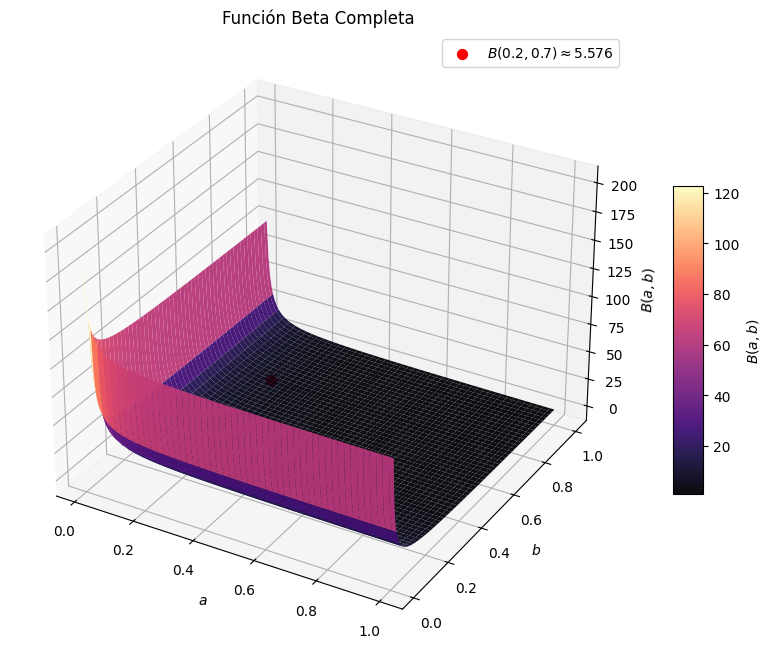

In [20]:
# Definimos el Dominio 

a = np.linspace(0.01, 1, 200)  
b = np.linspace(0.01, 1, 200)  

A, B = np.meshgrid(a, b)

# Calculamos la Funcion Beta 

Y = (gammafn(A) * gammafn(B)) / gammafn(A + B)

# Calculamos la Funcion Beta de un Punto con la Integral (a = 0.2, b = 0.7)

beta_02_07, _ = integrate.quad(lambda t: t**(0.2 - 1) * (1 - t)**(0.7 - 1), a = 0, b = 1)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(A, B, Y, cmap = 'magma', edgecolor = 'none', alpha = 0.95)
ax.scatter(0.2, 0.7, beta_02_07, color = 'red', s=50, label = fr'$B(0.2, 0.7) \approx {beta_02_07:.3f}$')

ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
ax.set_zlabel('$B(a, b)$')
ax.set_title('Función Beta Completa')
ax.legend()
fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 10, label = '$B(a, b)$')

plt.show()

### **Funcion Beta Incompleta**

$$B(z; a, b) = \int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt$$

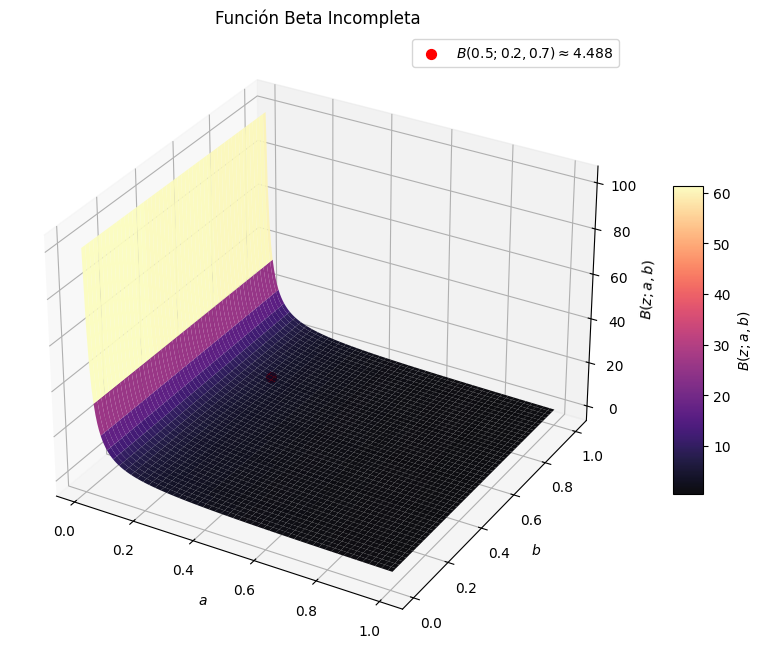

In [21]:
# Definimos el Dominio 

a = np.linspace(0.01, 1, 200)  
b = np.linspace(0.01, 1, 200)  

A, B = np.meshgrid(a, b)

z = 0.5

# Calculamos la Funcion Beta Incompleta

Y = betafn(A, B) * betaincfn(A, B, z)

# Calculamos la Funcion Beta Incompleta de un Punto con la Integral (a = 0.2, b = 0.7)

beta_incompleta_02_07, _ = integrate.quad(lambda t: t**(0.2 - 1) * (1 - t)**(0.7 - 1), a = 0, b = z)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(A, B, Y, cmap='magma', edgecolor='none', alpha = 0.95)
ax.scatter(0.2, 0.7, beta_incompleta_02_07, color = 'red', s=50, label = fr'$B(0.5; 0.2, 0.7) \approx {beta_incompleta_02_07:.3f}$')

ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
ax.set_zlabel('$B(z; a, b)$')
ax.set_title('Función Beta Incompleta')
ax.legend()
fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 10, label = '$B(z; a, b)$')

plt.show()

### **Funcion Beta Incompleta Regularizada** 

$$I_z(a, b) = \frac{B(z; a, b)}{B(a, b)} = \frac{\int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt}{\int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt} = \frac{\int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt}{\frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}} $$

* $B(z; a, b) = \int_0^z t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt$ es la **Funcion Beta Incompleta** 

* $B(a, b) = \int_0^1 t^{a - 1} \cdot (1 - t)^{b - 1} \cdot dt = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$ es la **Funcion Beta Completa** 

* $\Gamma(x)$ es la **Funcion Gamma**

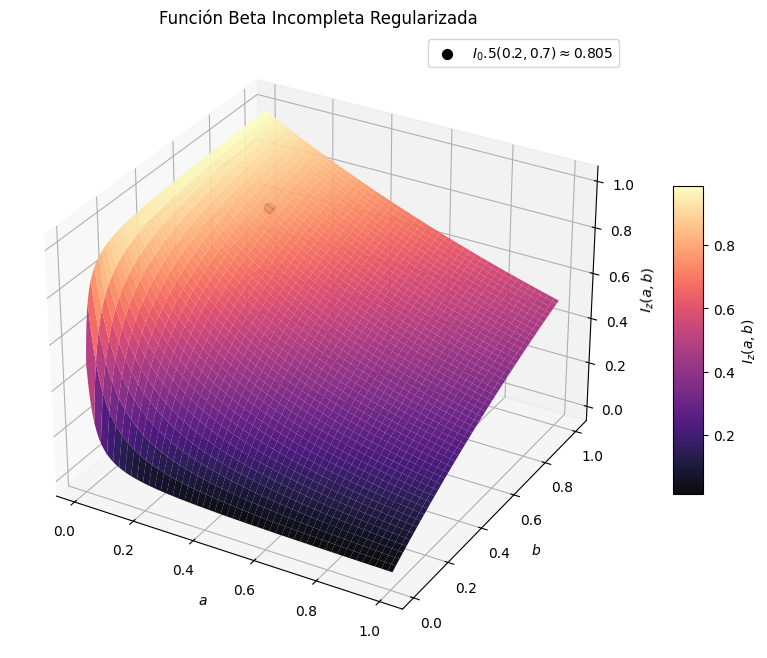

In [22]:
# Definimos el Dominio 

a = np.linspace(0.01, 1, 200)  
b = np.linspace(0.01, 1, 200)  

A, B = np.meshgrid(a, b)

z = 0.5

# Calculamos la Funcion Beta Incompleta Regularizada

Y = betaincfn(A, B, z)

# Calculamos la Funcion Beta Incompleta Regularizada de un Punto con la Integral (a = 0.2, b = 0.7)

beta_incompleta_02_07, _ = integrate.quad(lambda t: t**(0.2 - 1) * (1 - t)**(0.7 - 1), a = 0, b = z)
beta_02_07, _ = integrate.quad(lambda t: t**(0.2 - 1) * (1 - t)**(0.7 - 1), a = 0, b = 1) 

beta_incompleta_regularizada = beta_incompleta_02_07 / beta_02_07

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(A, B, Y, cmap='magma', edgecolor='none', alpha = 0.95)
ax.scatter(0.2, 0.7, beta_incompleta_regularizada, color = 'black', s = 50, label = fr'$I_{0.5}(0.2, 0.7) \approx {beta_incompleta_regularizada:.3f}$')

ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
ax.set_zlabel('$I_{z}(a, b)$')
ax.set_title('Función Beta Incompleta Regularizada')
ax.legend()
fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 10, label = '$I_{z}(a, b)$')

plt.show()

### **Funcion Digamma**

$$\psi(x) = \frac{d}{dx} \text{log} \left(\Gamma(x)\right) = \frac{\Gamma'(x)}{\Gamma(x)}$$

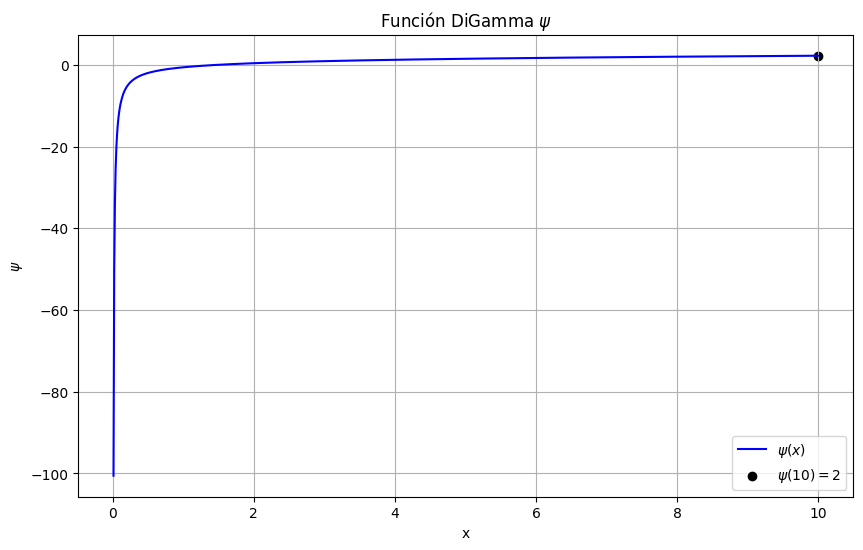

In [23]:
# Definimos el Dominio 

x = np.linspace(0.01, 10, 1000)  

# Calculamos la Funcion DiGamma 

y = digammafn(x) 

# Calculamos la Funcion DiGamma de un Punto (x = 10)

digamma_10 = digammafn(10)

# Visualizamos 

plt.figure(figsize = (10, 6))

plt.plot(x, y, label = r'$\psi(x)$', color = 'blue')
plt.scatter(10, digamma_10, color = 'black', label = f'$\psi(10) = {digamma_10: 0.0f}$')
plt.title('Función DiGamma $\psi$')
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.grid(True)
plt.legend()

plt.show()

### **Funcion Hipergeometrica**

$${}_{2}\text{F}_1(a, b, c, z) = \sum_{n = 0}^{\infty} \frac{a_n \cdot b_n\cdot z^n}{c_n \cdot n!} \quad |z| < 1$$

* En donde $a_n$ es el **simbolo de Pochhammer** $q_n = q \cdot (q + 1) \cdot (q + 2) \cdot \dots \cdot (q + n - 1)$

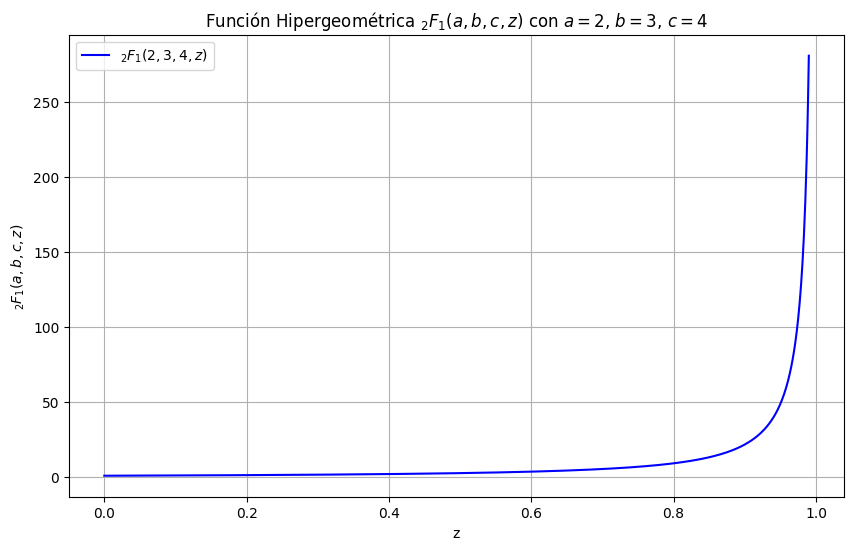

In [24]:
# Definimos el Dominio 

a = 2
b = 3
c = 4
z = np.linspace(0, 0.99, 1000)

# Calculamos la Funcion Hipergeometrica 

y = hyp2f1(a, b, c, z)

# Visualización

plt.figure(figsize = (10, 6))

plt.plot(z, y, label=fr'${{{{}}}}_2F_1({a}, {b}, {c}, z)$', color = 'blue')
plt.title(fr'Función Hipergeométrica ${{{{}}}}_2F_1(a, b, c, z)$ con $a={a}$, $b={b}$, $c={c}$')
plt.xlabel('z')
plt.ylabel(r'${}_2F_1(a, b, c, z)$')
plt.grid(True)
plt.legend()
plt.show()